# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 8.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

Честно взяв решение отсюда https://stats.stackexchange.com/questions/303446/deriving-linear-regression-gradient-with-mse получаем:
$$\nabla Q(w) = \frac{2}{\ell}X^T(y - Xw)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [7]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [8]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95997848/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/96000509/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/96001776/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/96007803/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/96008952/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [10]:
data = pd.read_csv('autos.csv')

In [11]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

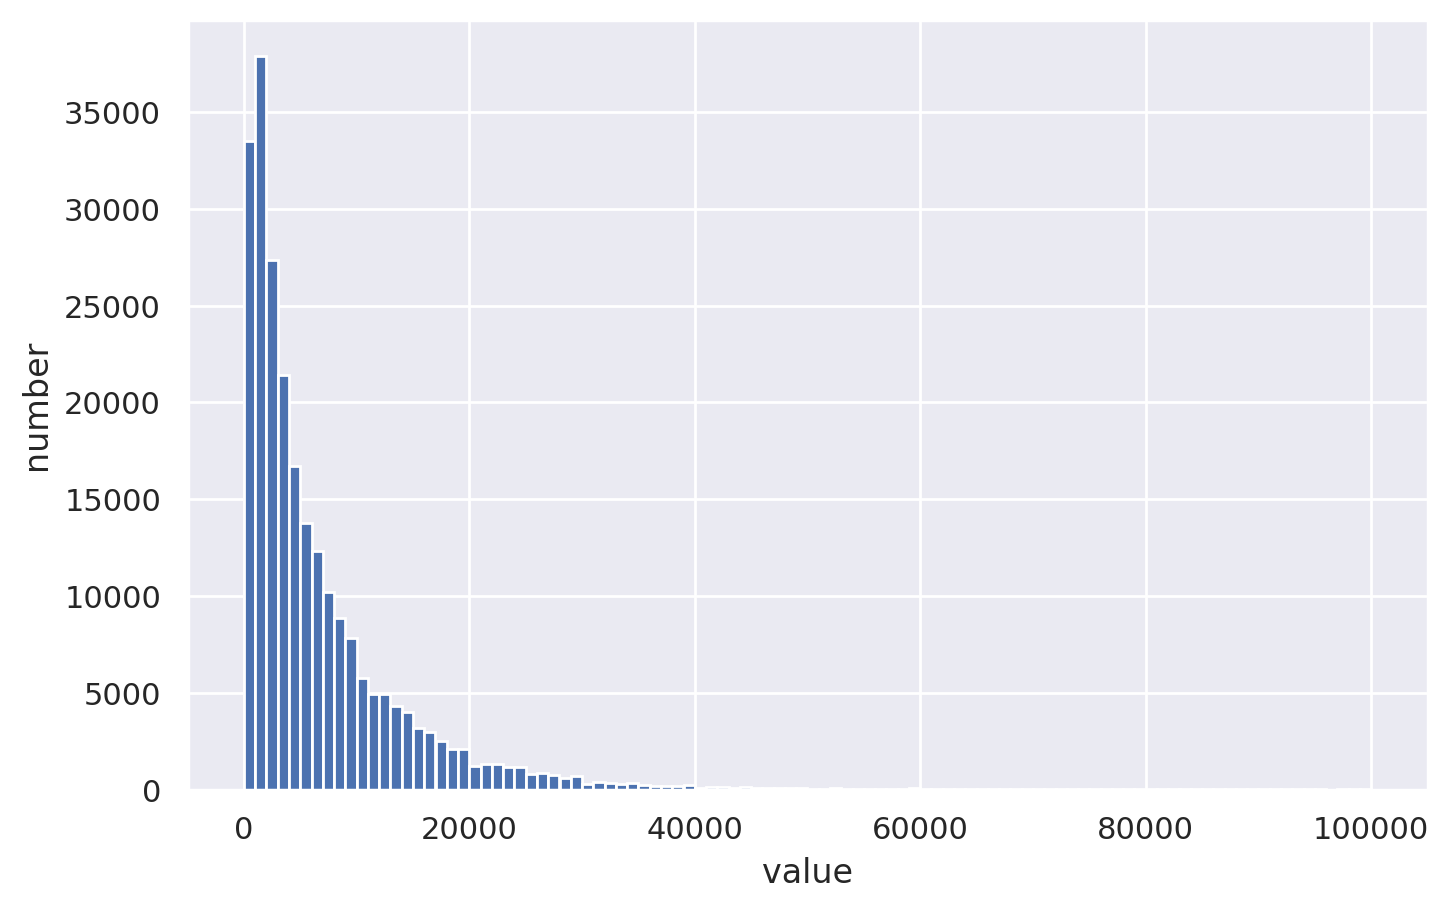

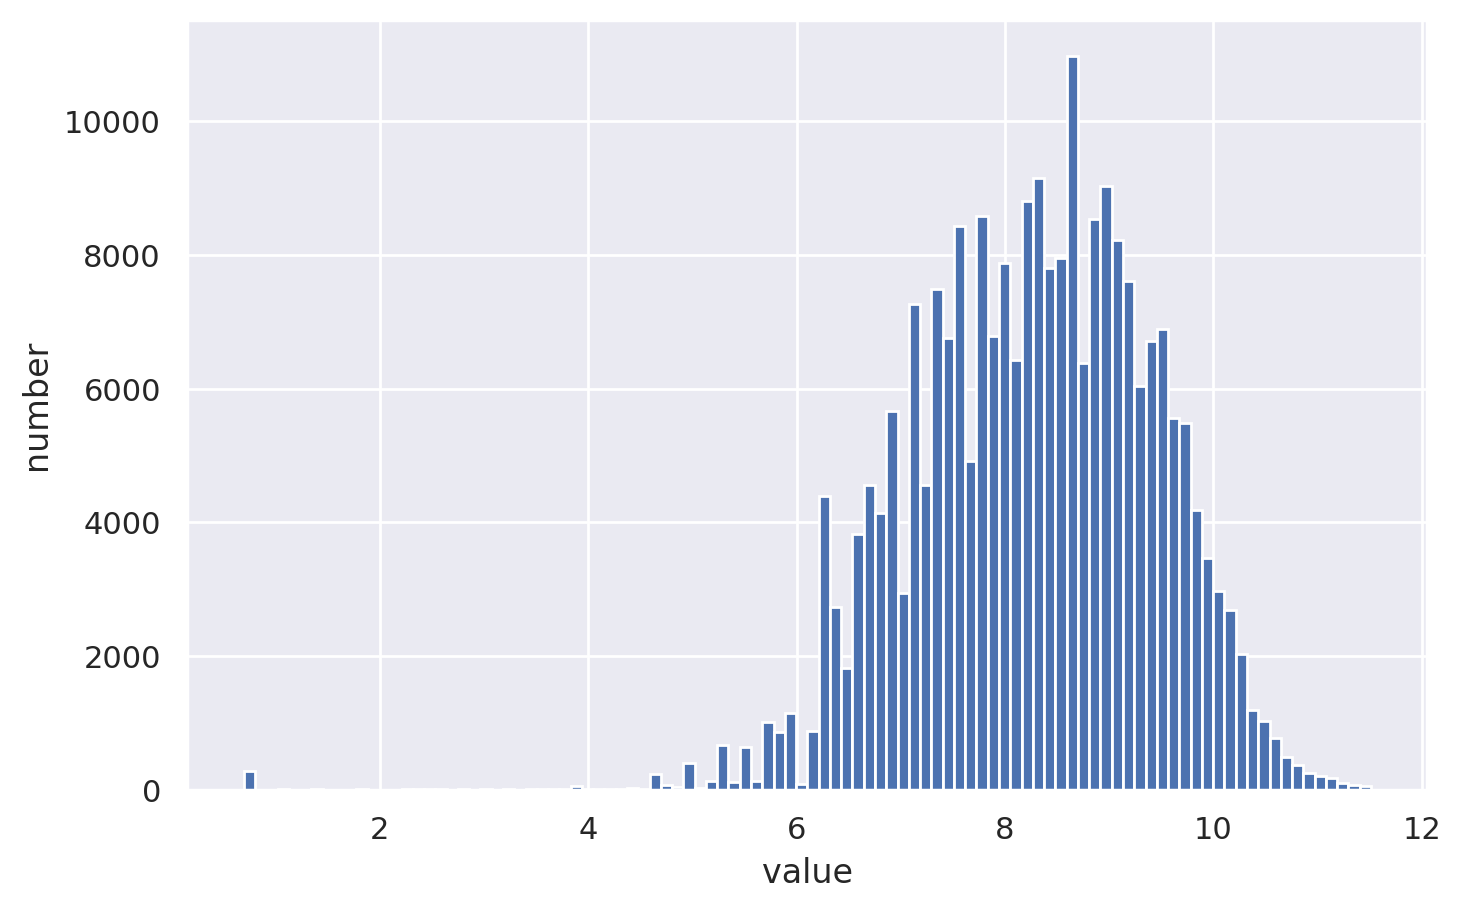

In [12]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 7.5
sns.set_style('darkgrid')

plt.hist(data['price'], bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.show()
plt.hist(np.log1p(data['price']), bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.show()

In [13]:
if 'price' in data: #чтобы не было больно перезапускать
    data['log_price'] = np.log1p(data['price'])
    data = data.drop(columns=['price'])
data['log_price']

0          7.313887
1          8.188967
2          6.478510
3          7.696667
4          7.601402
            ...    
241185     8.974745
241186     8.071219
241187     7.090077
241188     9.127067
241189    10.274741
Name: log_price, Length: 241190, dtype: float64

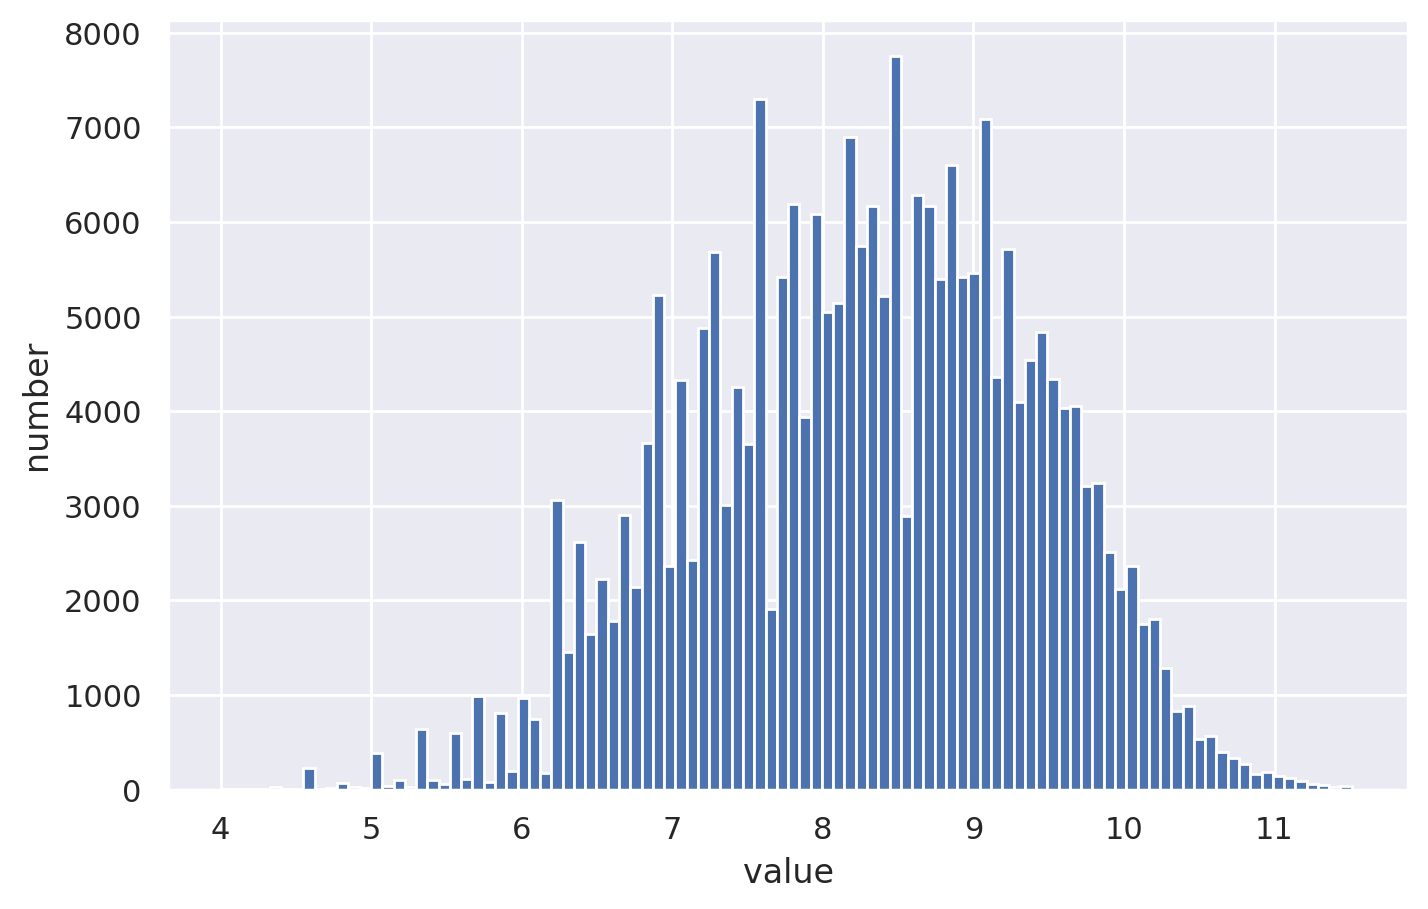

In [14]:
# удаляем выбросы
data = data[((data['log_price'] > 4) & (data['log_price'] < 12))]
plt.hist(data['log_price'], bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.show()

Смотрим на бренды:

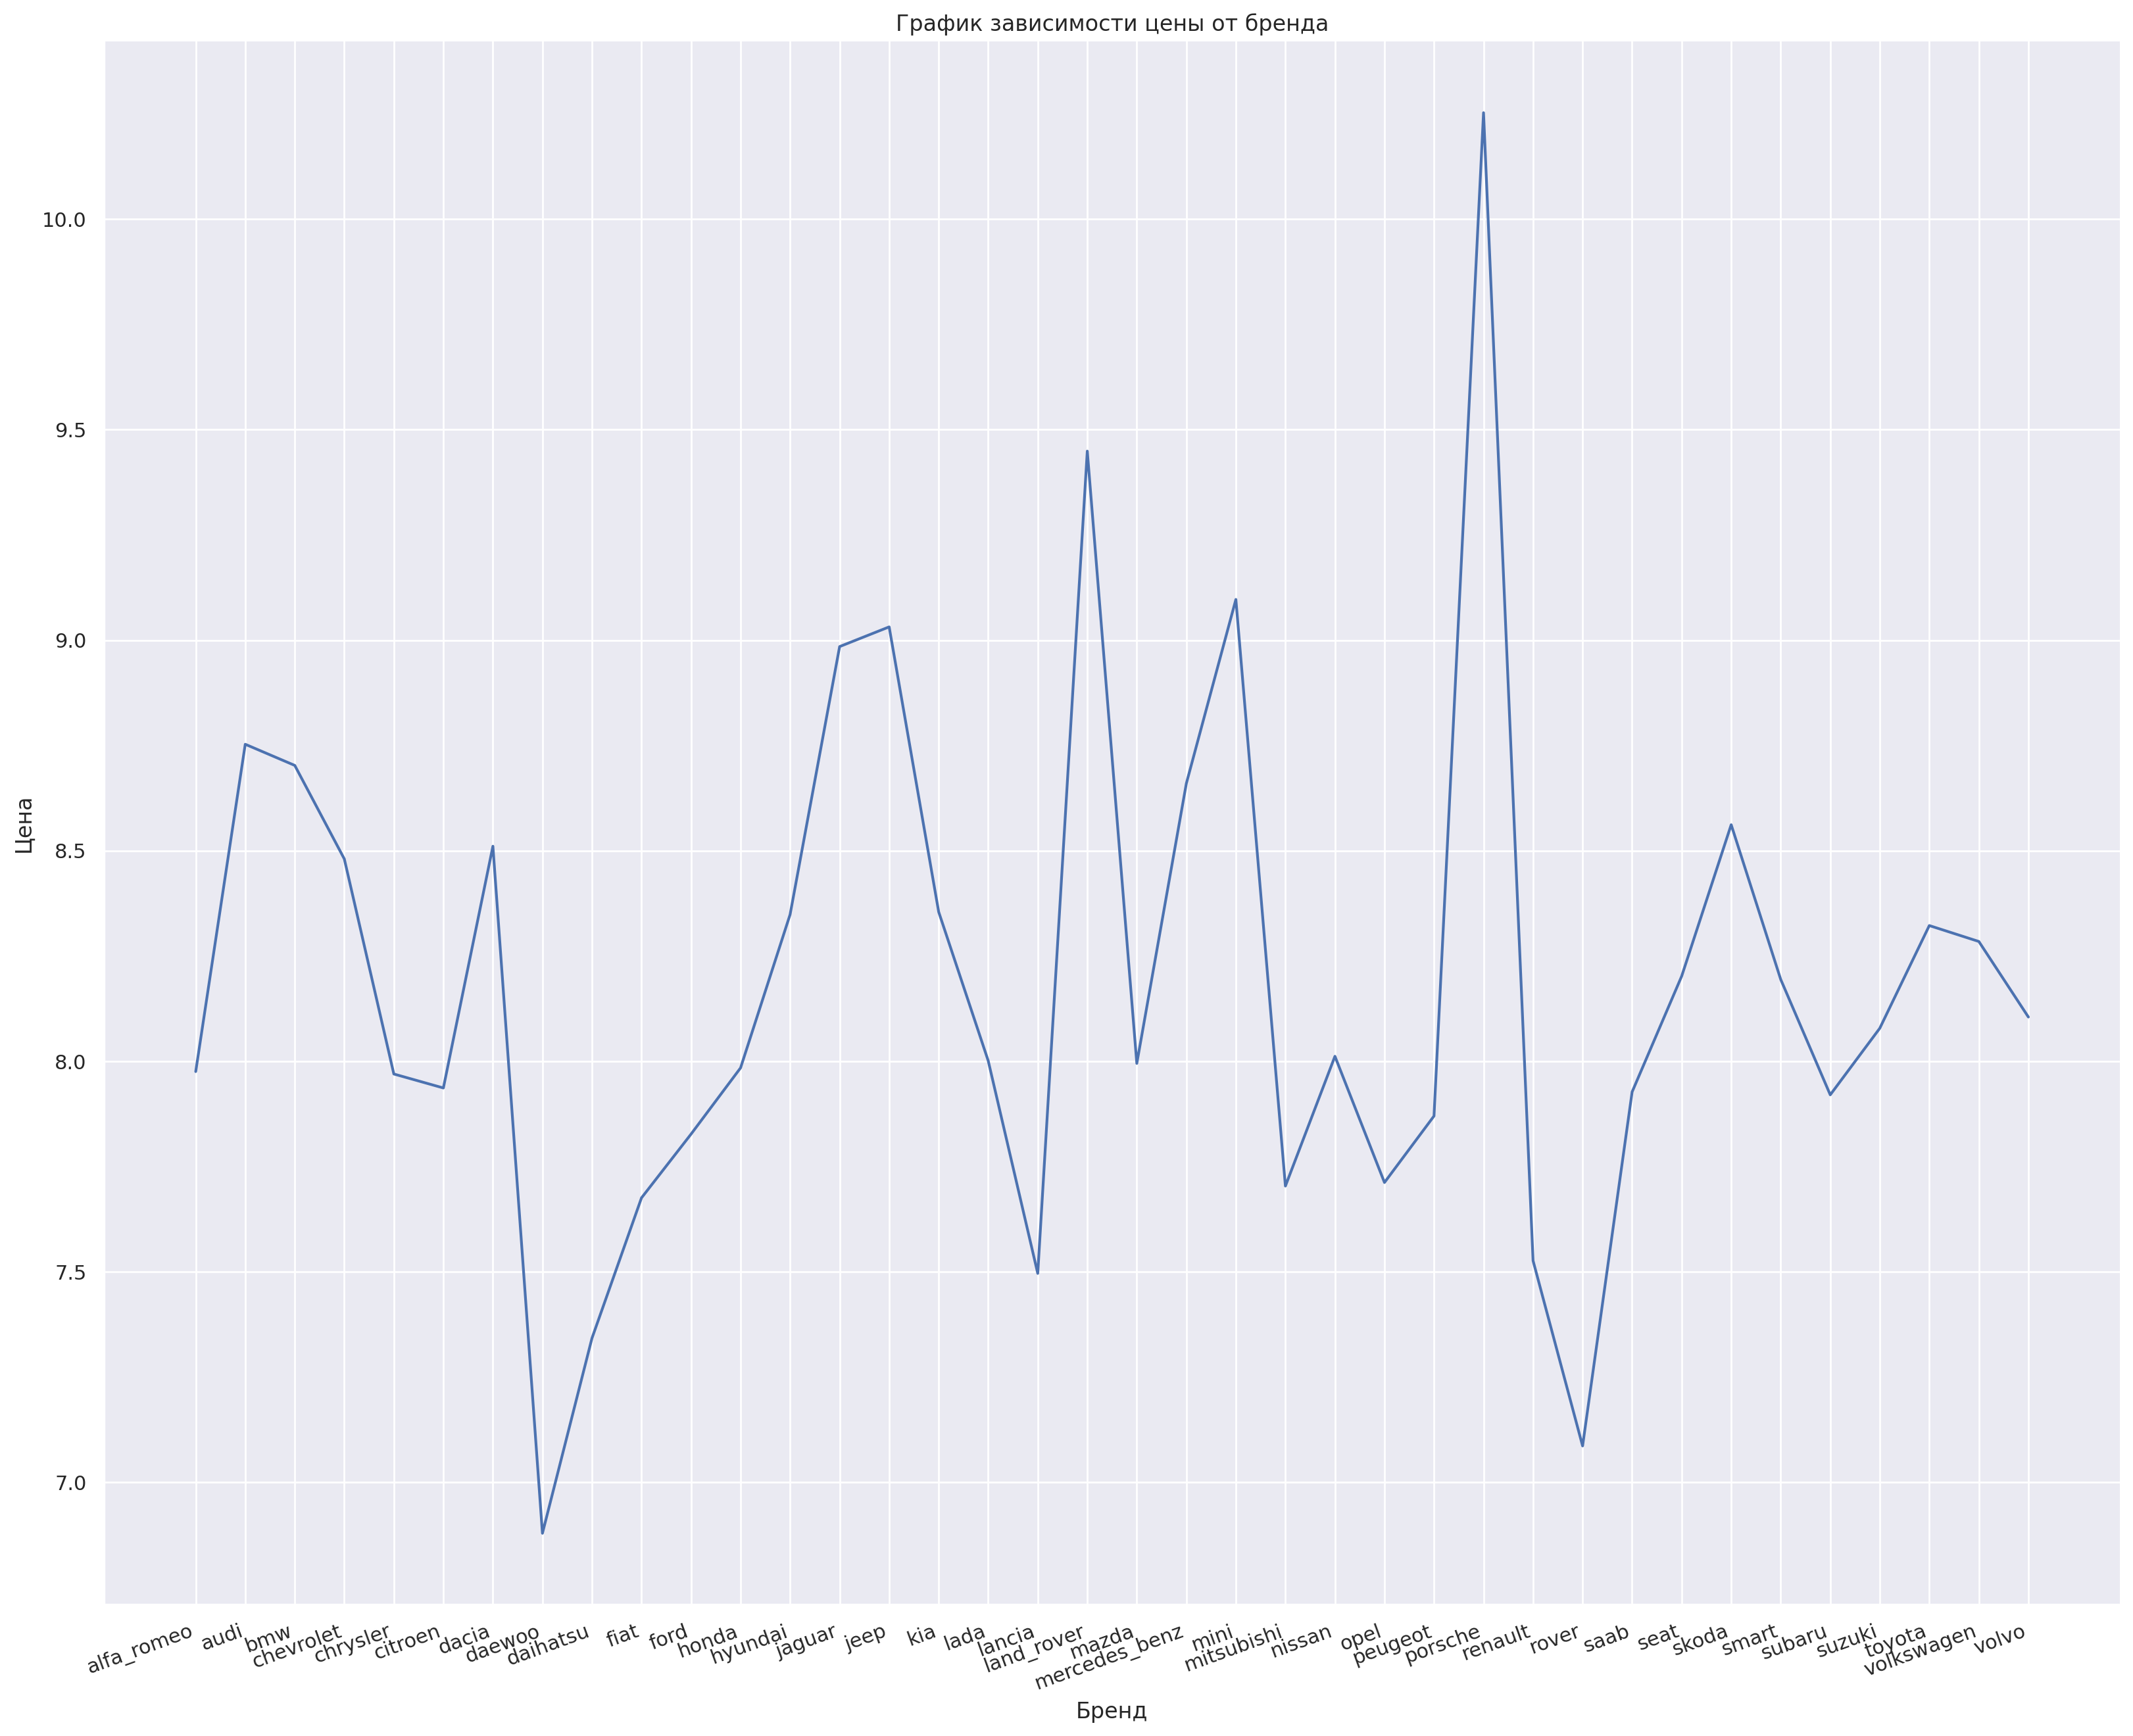

In [15]:
import warnings
warnings.filterwarnings('ignore')

tmp = data[['brand', 'log_price']].groupby('brand').mean()
tmp
plt.rcParams['font.size'] = 50
sns.relplot(data=tmp['log_price'], kind='line').fig.set_size_inches(30, 20)
plt.title('График зависимости цены от бренда')
plt.xlabel('Бренд')
plt.ylabel('Цена')
plt.xticks(rotation=20, ha='right')
plt.show()

Сорян щас перезапустил на своем 13 дюймовом ноуте и выглядит очень больно, если моник < 27 дюймов, то рекомендую поверить что это в моих глазах было очень даже адекватно)

Добавим признаки для дорогих (>= 8.5) брендов:

In [16]:
#add
data['expensive_brand'] = np.where([(data['brand'] == 'audi') |
                                     (data['brand'] == 'bmw') |
                                     (data['brand'] == 'dacia') |
                                     (data['brand'] == 'jaguar') |
                                     (data['brand'] == 'jeep') |
                                     (data['brand'] == 'land_rover') |
                                     (data['brand'] == 'mini') |
                                     (data['brand'] == 'porsche') |
                                     (data['brand'] == 'skoda')][0], True, False)

Смотрим на тип транспортного средства:

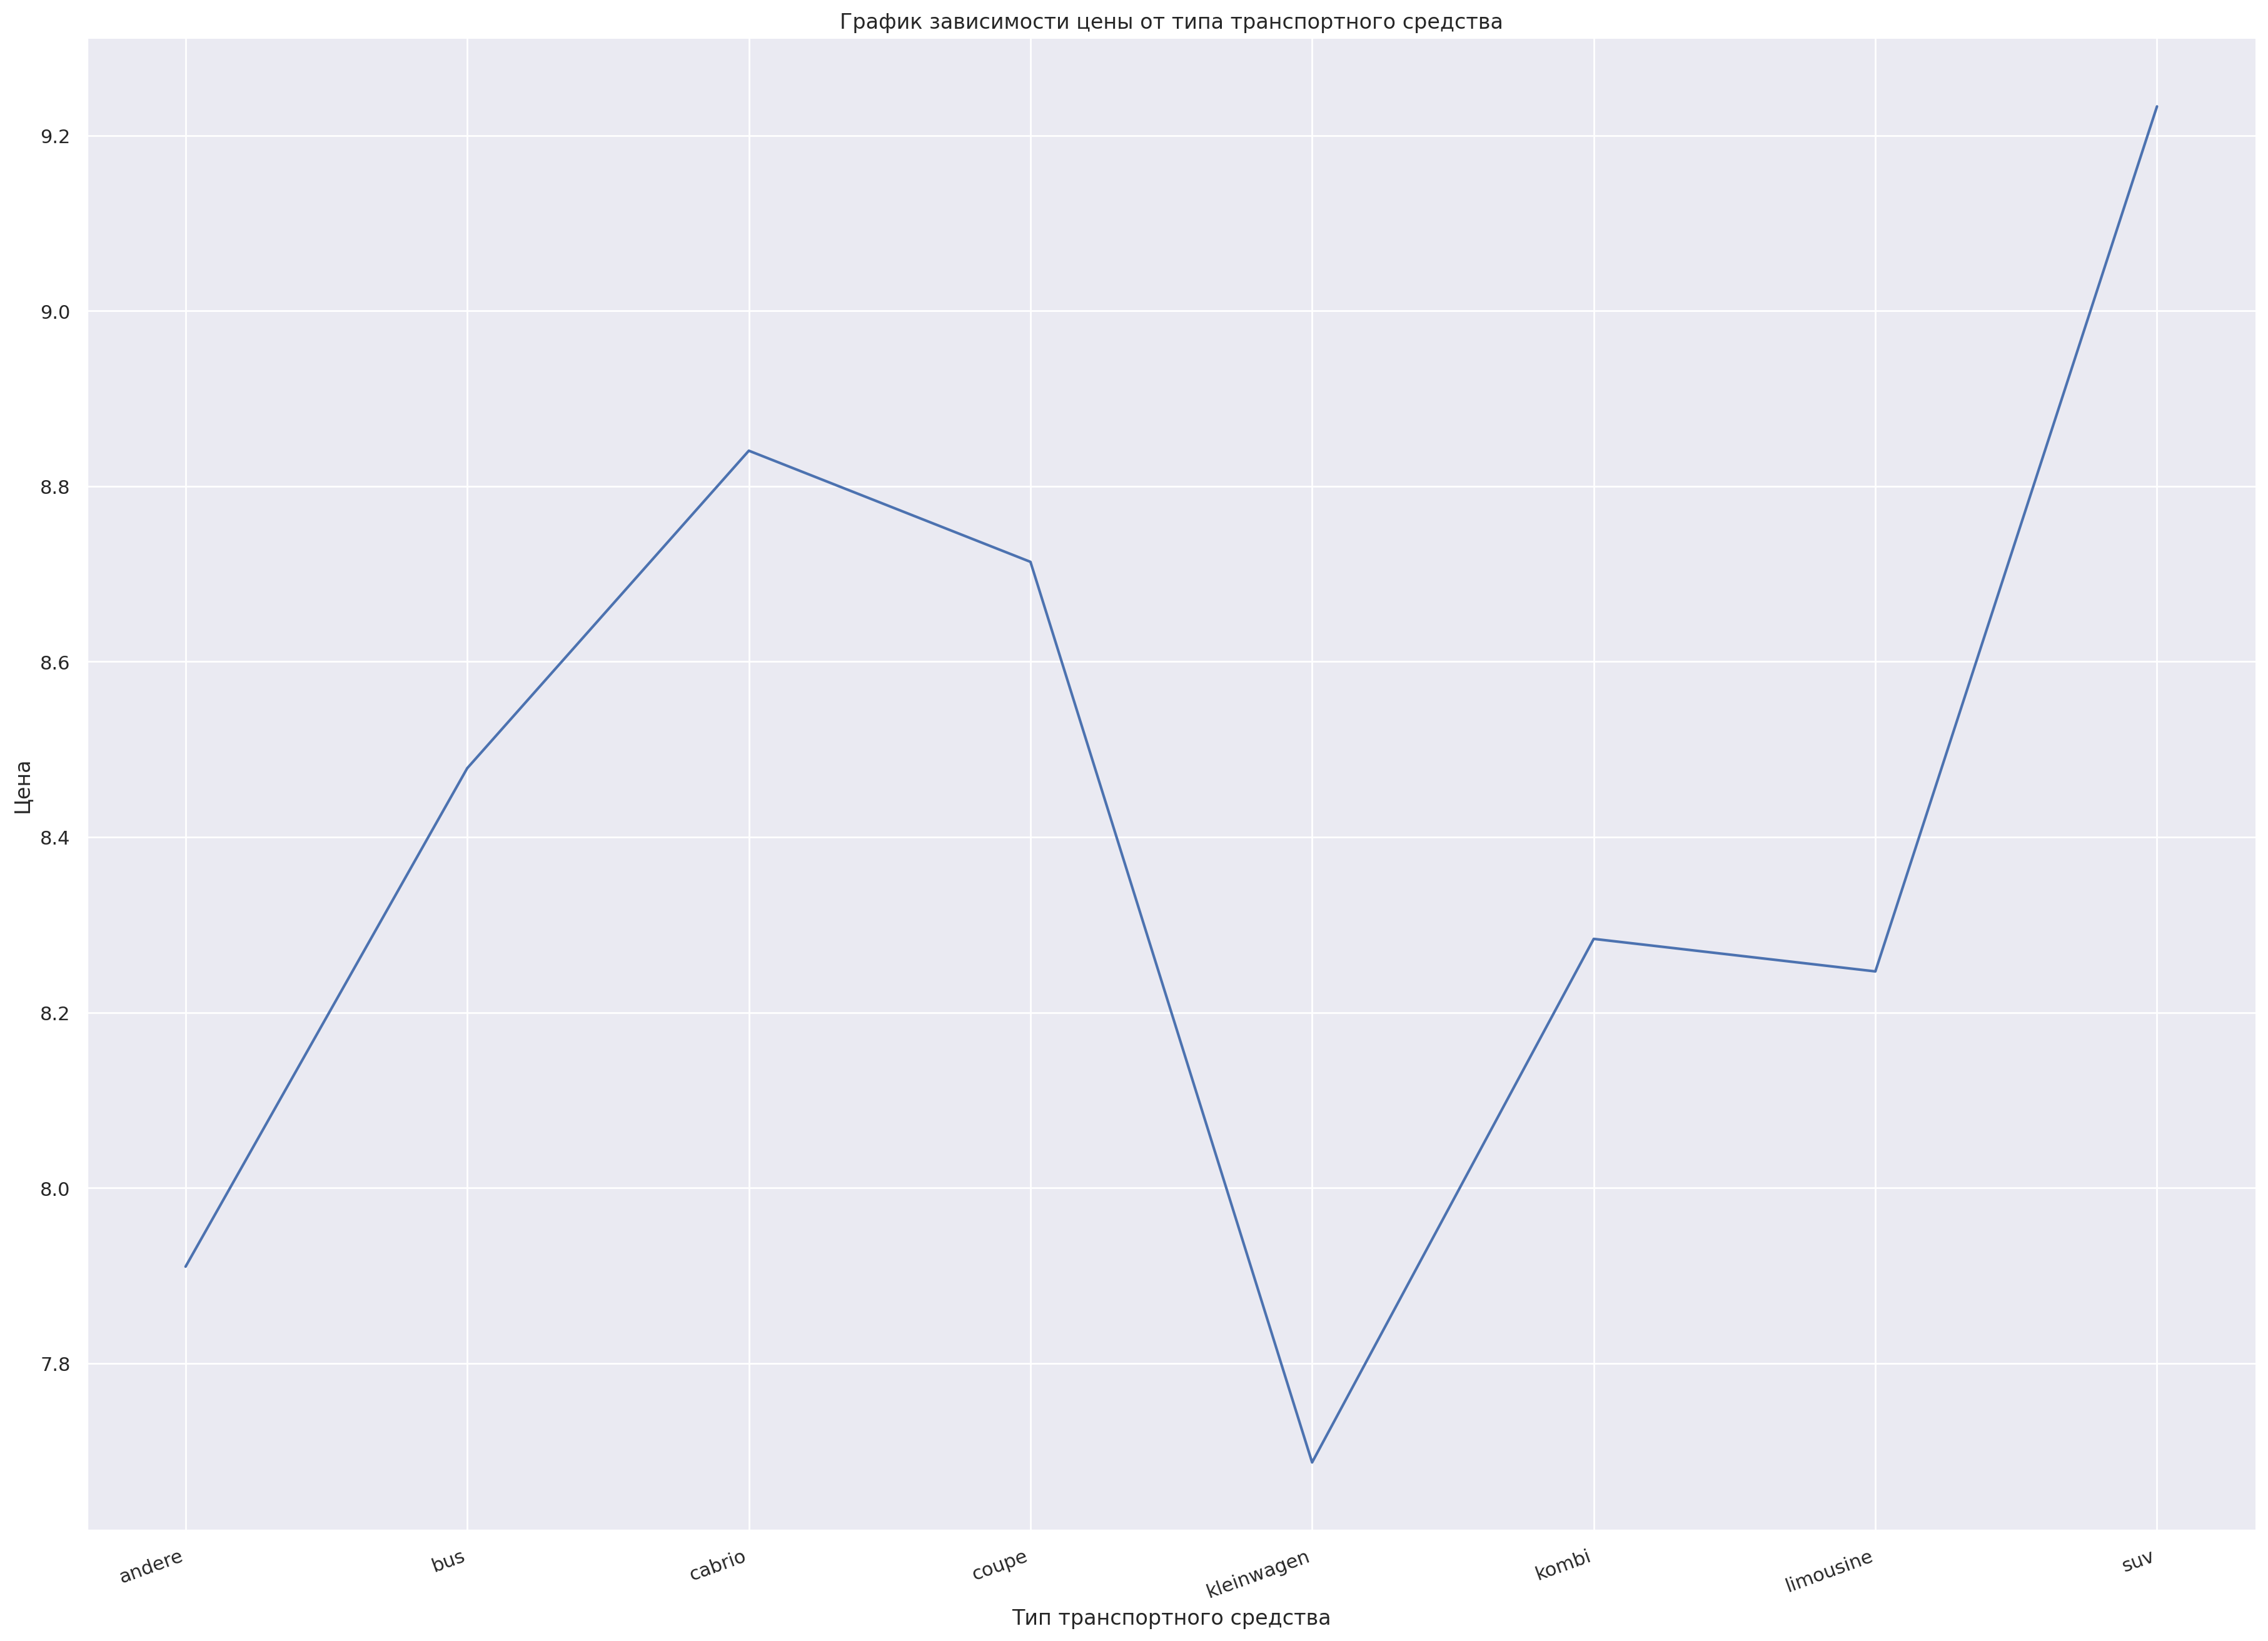

In [17]:
import warnings
warnings.filterwarnings('ignore')

tmp = data[['vehicleType', 'log_price']].groupby('vehicleType').mean()
tmp
plt.rcParams['font.size'] = 50
sns.relplot(data=tmp['log_price'], kind='line').fig.set_size_inches(30, 20)
plt.title('График зависимости цены от типа транспортного средства')
plt.xlabel('Тип транспортного средства')
plt.ylabel('Цена')
plt.xticks(rotation=20, ha='right')
plt.show()

Добавим признаки для дорогих типов:

In [18]:
#add
data['expensive_vehicleType'] = np.where([(data['vehicleType'] == 'cabrio') |
                                     (data['vehicleType'] == 'coupe') |
                                     (data['vehicleType'] == 'suv')][0], True, False)

Смотрим на тип трансмисcии:

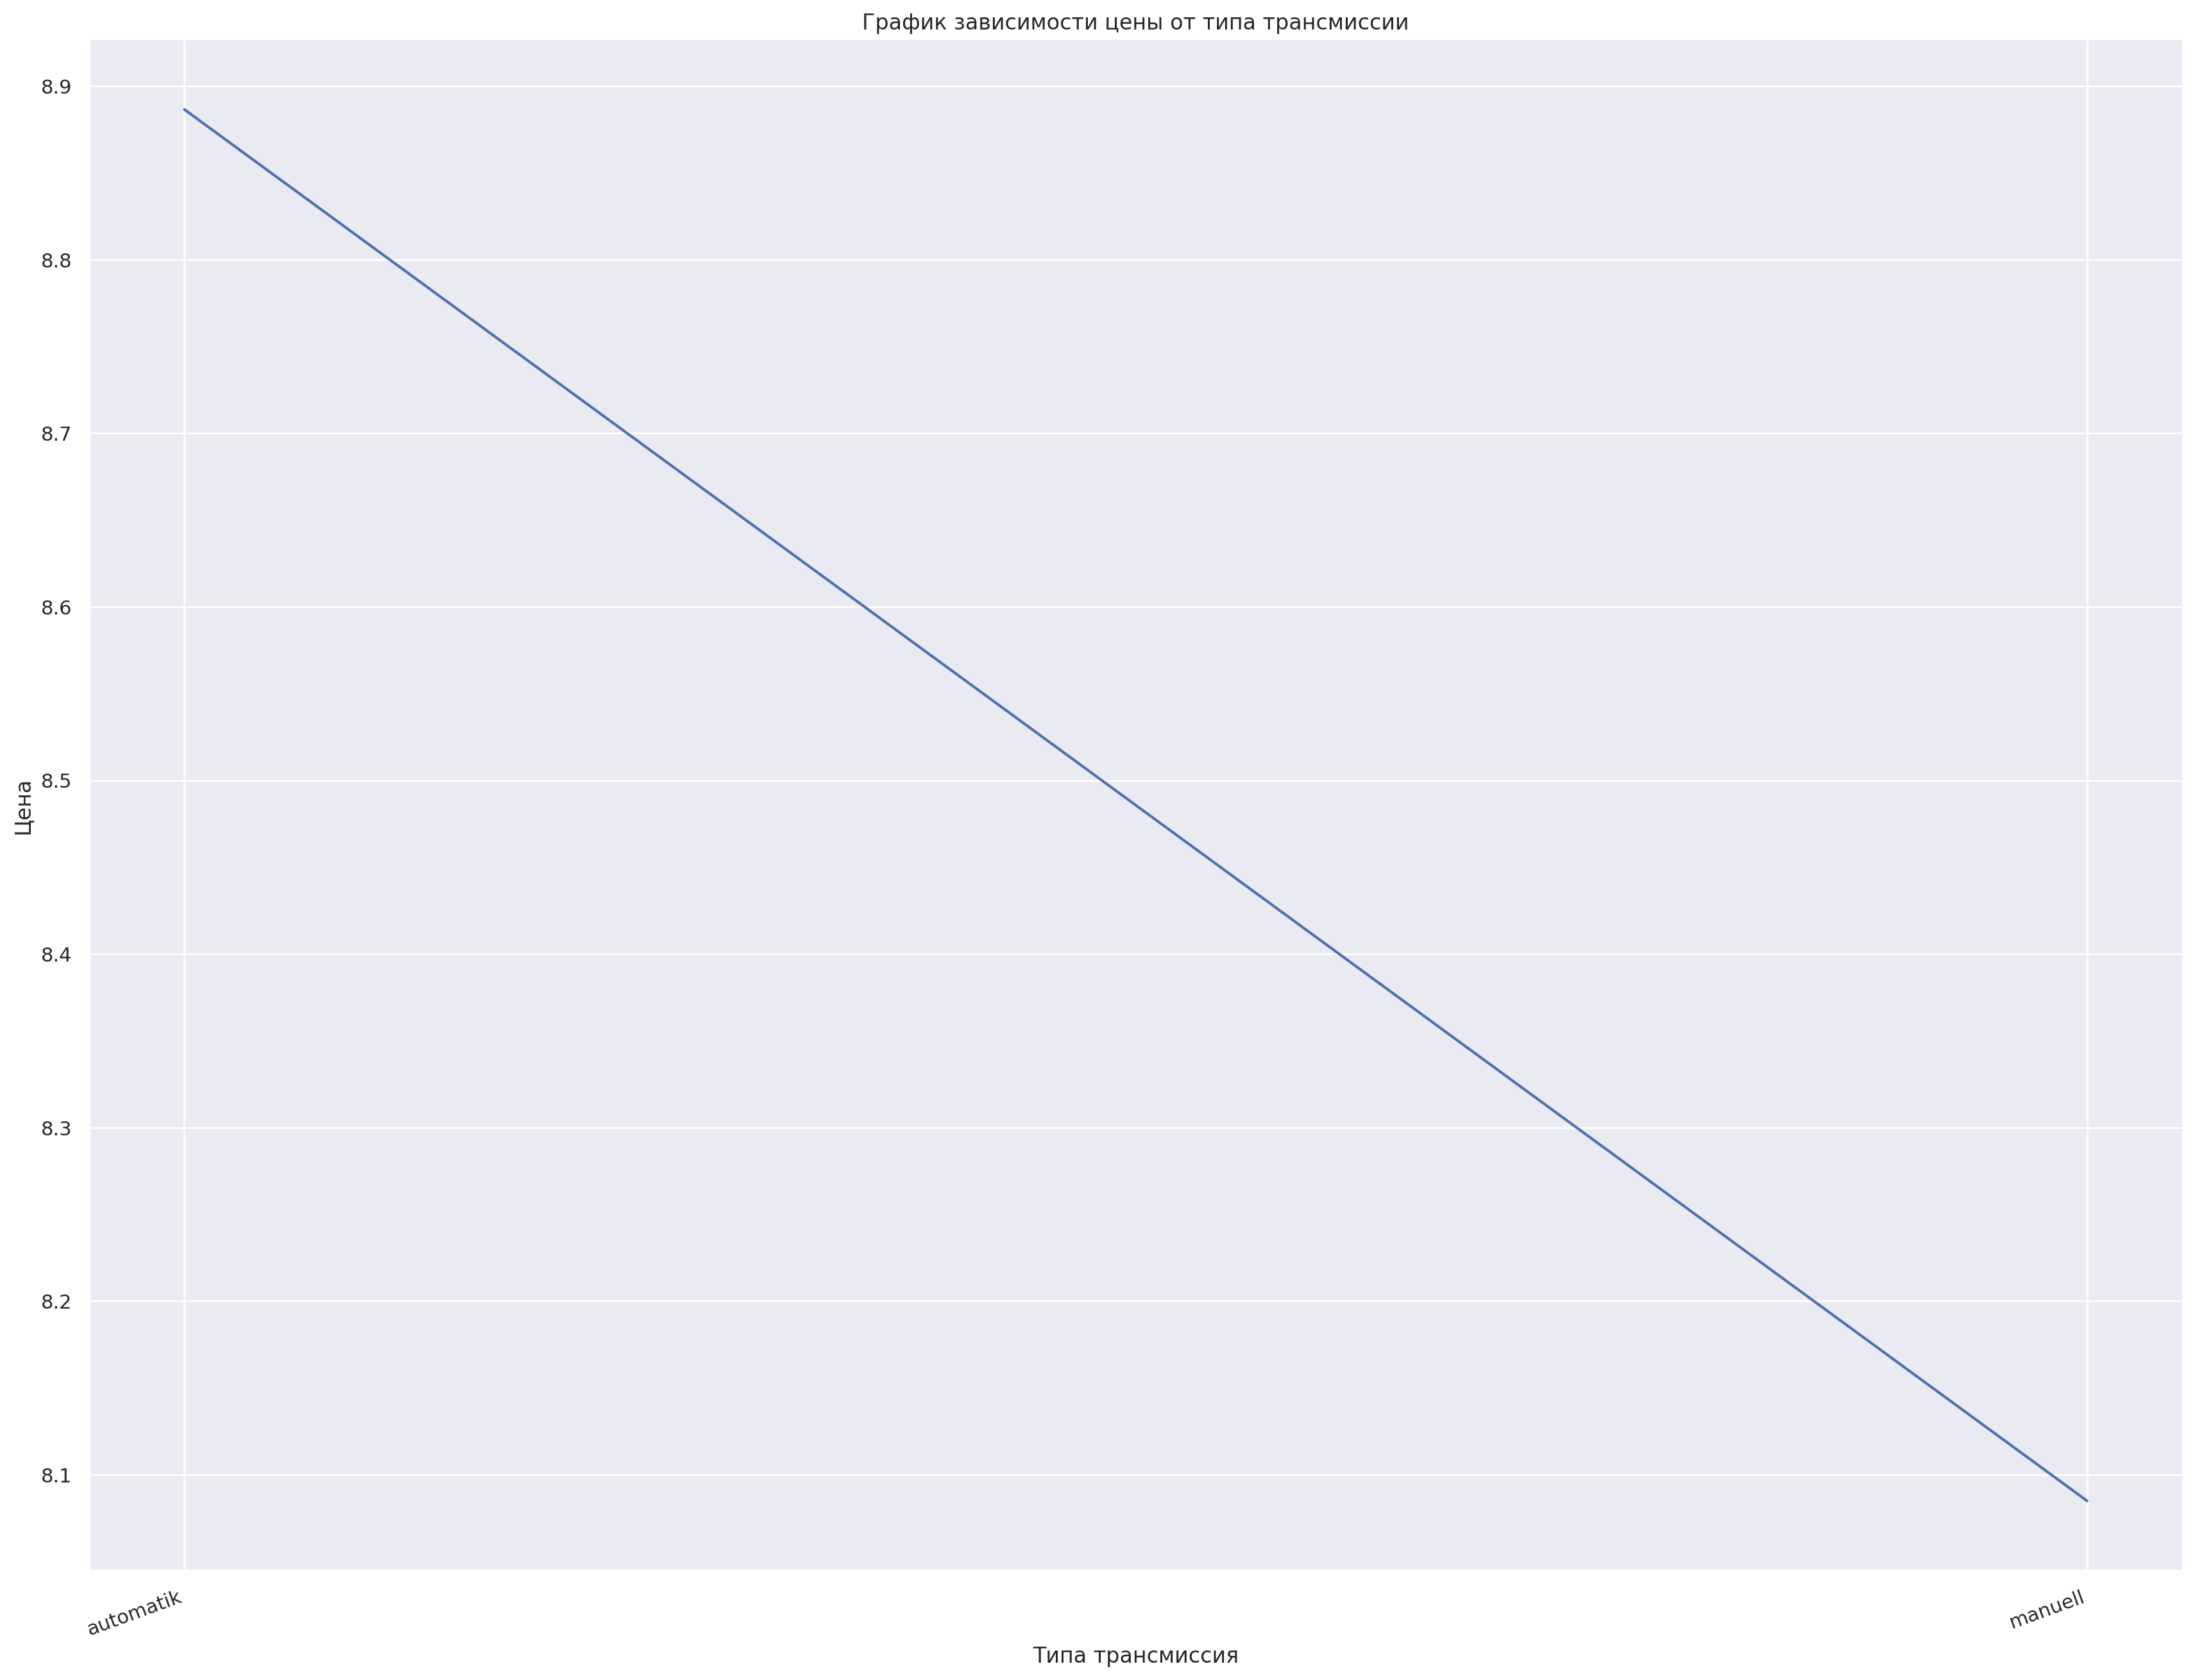

In [19]:
import warnings
warnings.filterwarnings('ignore')

tmp = data[['gearbox', 'log_price']].groupby('gearbox').mean()
tmp
plt.rcParams['font.size'] = 50
sns.relplot(data=tmp['log_price'], kind='line').fig.set_size_inches(30, 20)
plt.title('График зависимости цены от типа трансмиссии')
plt.xlabel('Типа трансмиссия')
plt.ylabel('Цена')
plt.xticks(rotation=20, ha='right')
plt.show()

Тут добавлять и нечего

Смотрим на вид топлива, есть ли в автомобиле неисправность, возраст автомобиля:

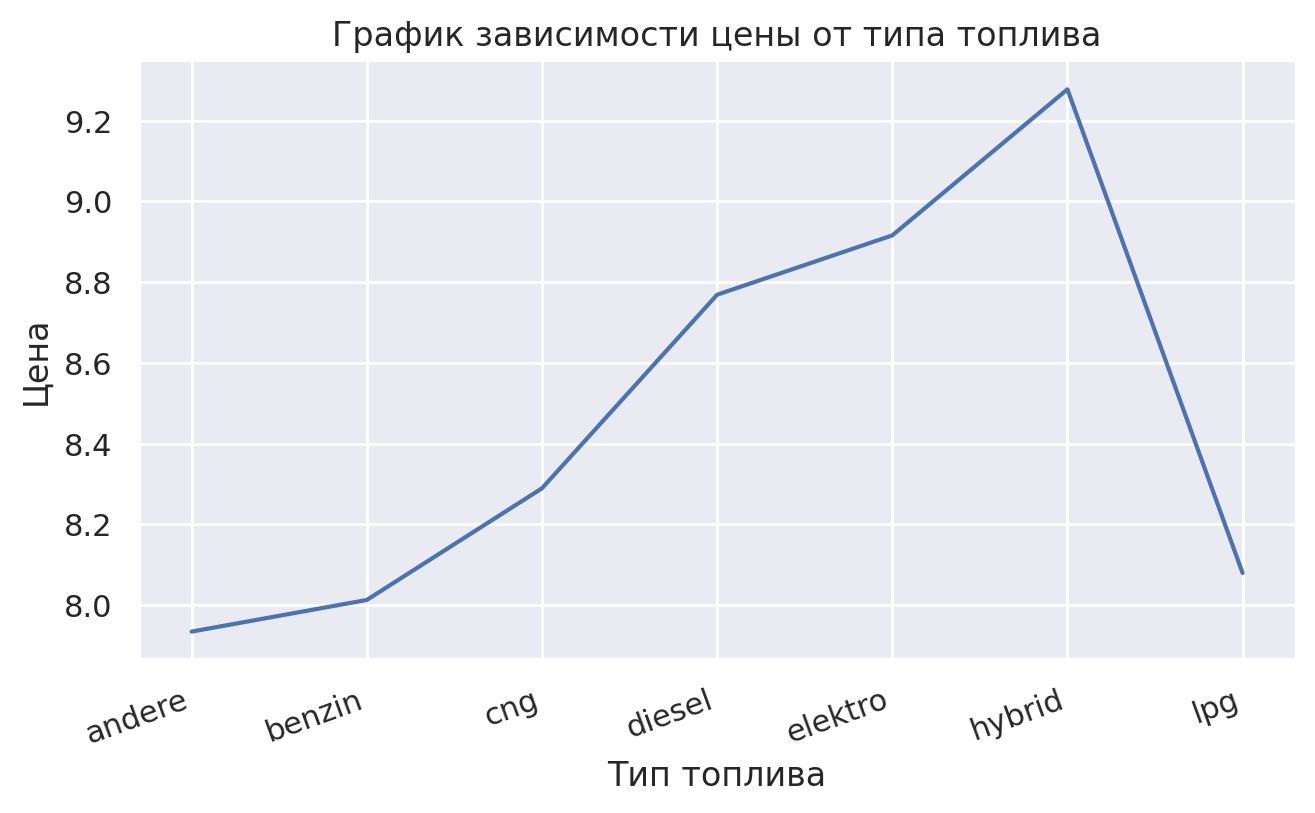

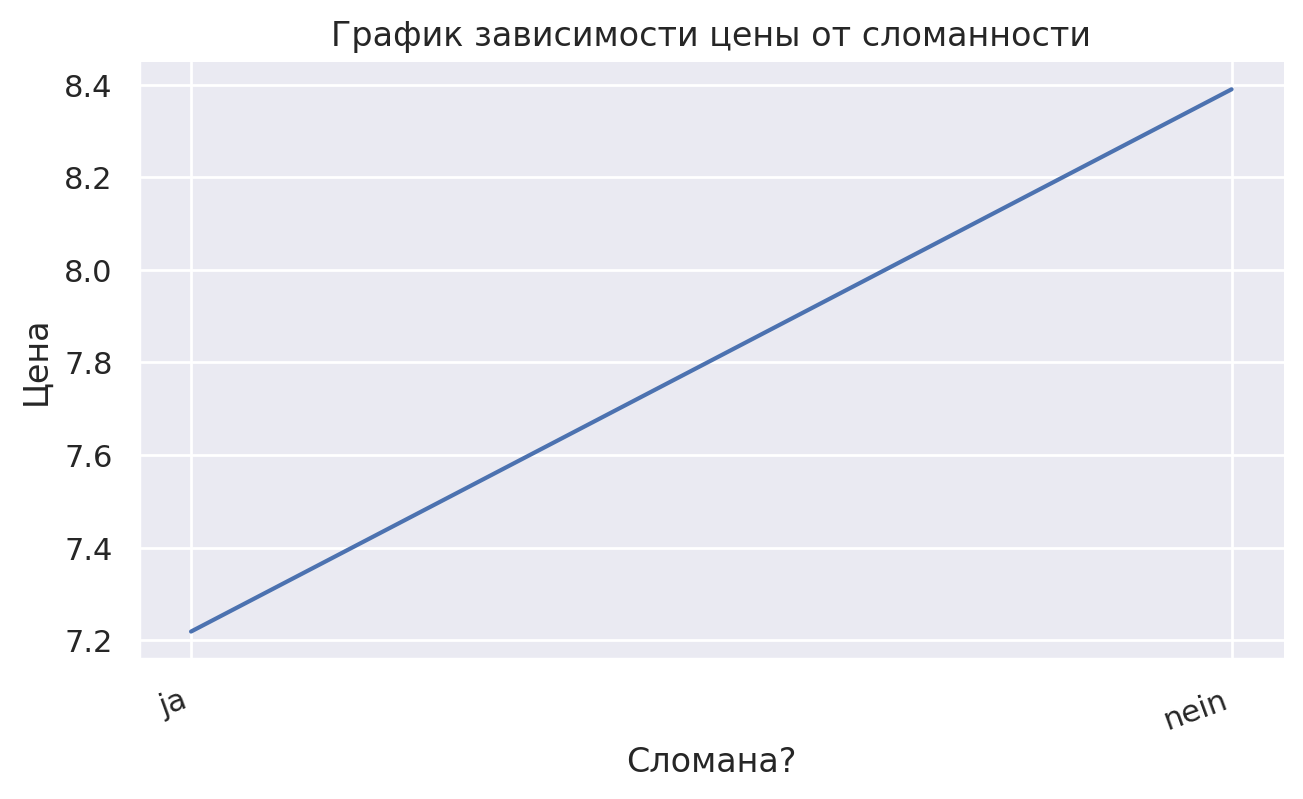

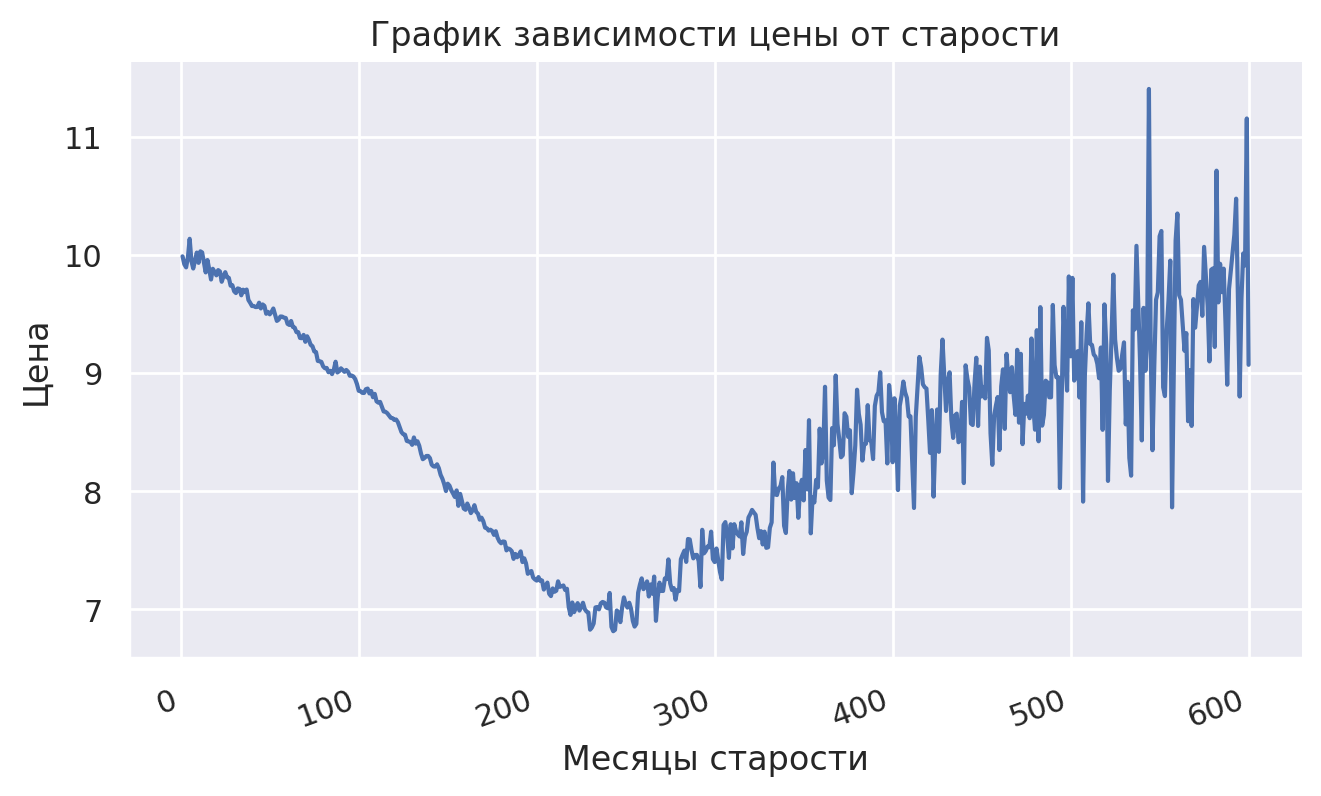

In [20]:
import warnings
warnings.filterwarnings('ignore')

tmp = data[['fuelType', 'log_price']].groupby('fuelType').mean()
tmp
plt.rcParams['font.size'] = 50
sns.relplot(data=tmp['log_price'], kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости цены от типа топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Цена')
plt.xticks(rotation=20, ha='right')
plt.show()
tmp = data[['notRepairedDamage', 'log_price']].groupby('notRepairedDamage').mean()
tmp
plt.rcParams['font.size'] = 50
sns.relplot(data=tmp['log_price'], kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости цены от сломанности')
plt.xlabel('Сломана?')
plt.ylabel('Цена')
plt.xticks(rotation=20, ha='right')
plt.show()
tmp = data[['autoAgeMonths', 'log_price']].groupby('autoAgeMonths').mean()
tmp
plt.rcParams['font.size'] = 50
sns.relplot(data=tmp['log_price'], kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости цены от старости')
plt.xlabel('Месяцы старости')
plt.ylabel('Цена')
plt.xticks(rotation=20, ha='right')
plt.show()

Добавим признаки для старых и новых авто:

In [21]:
#add
data['new_auto'] = np.where([(data['autoAgeMonths'] <= 150)][0], True, False)
data['old_auto'] = np.where([(data['autoAgeMonths'] >= 400)][0], True, False)

Смотрим на мощность автомобиля и километраж:

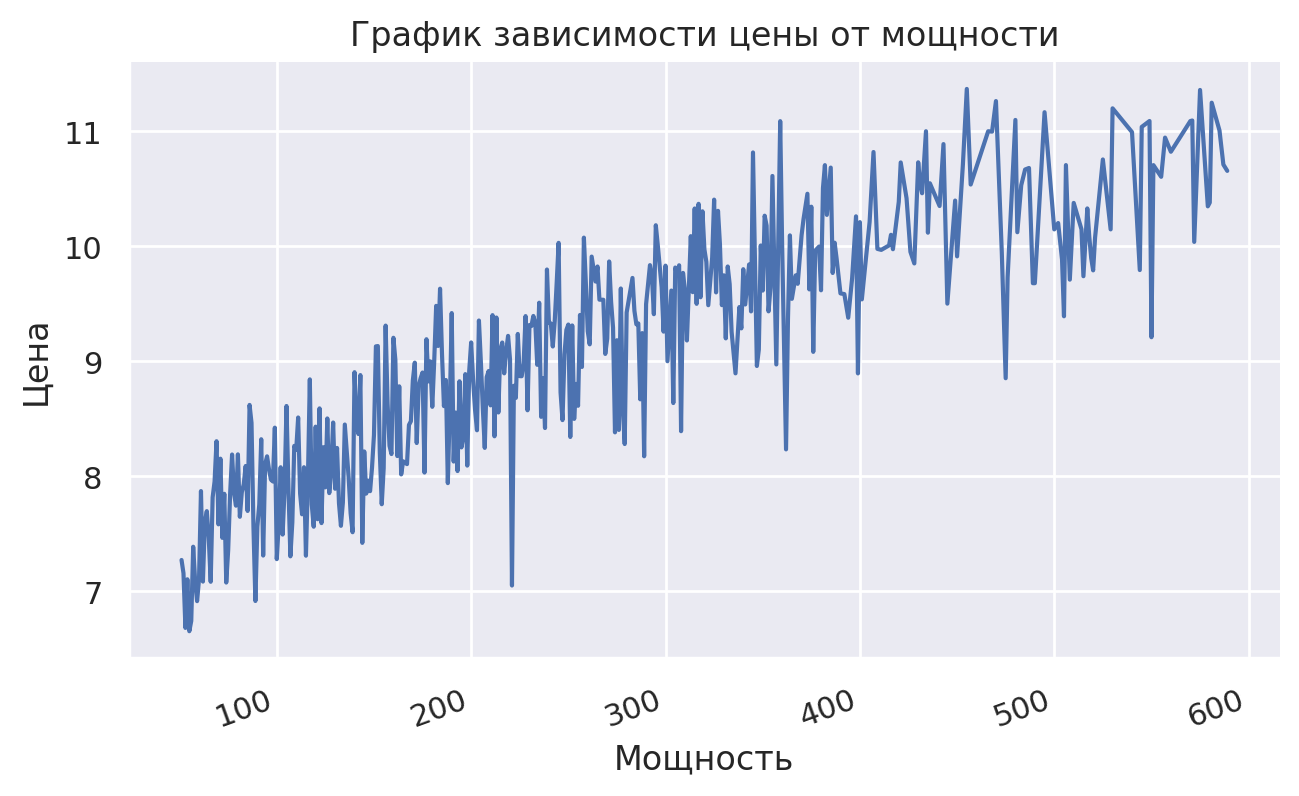

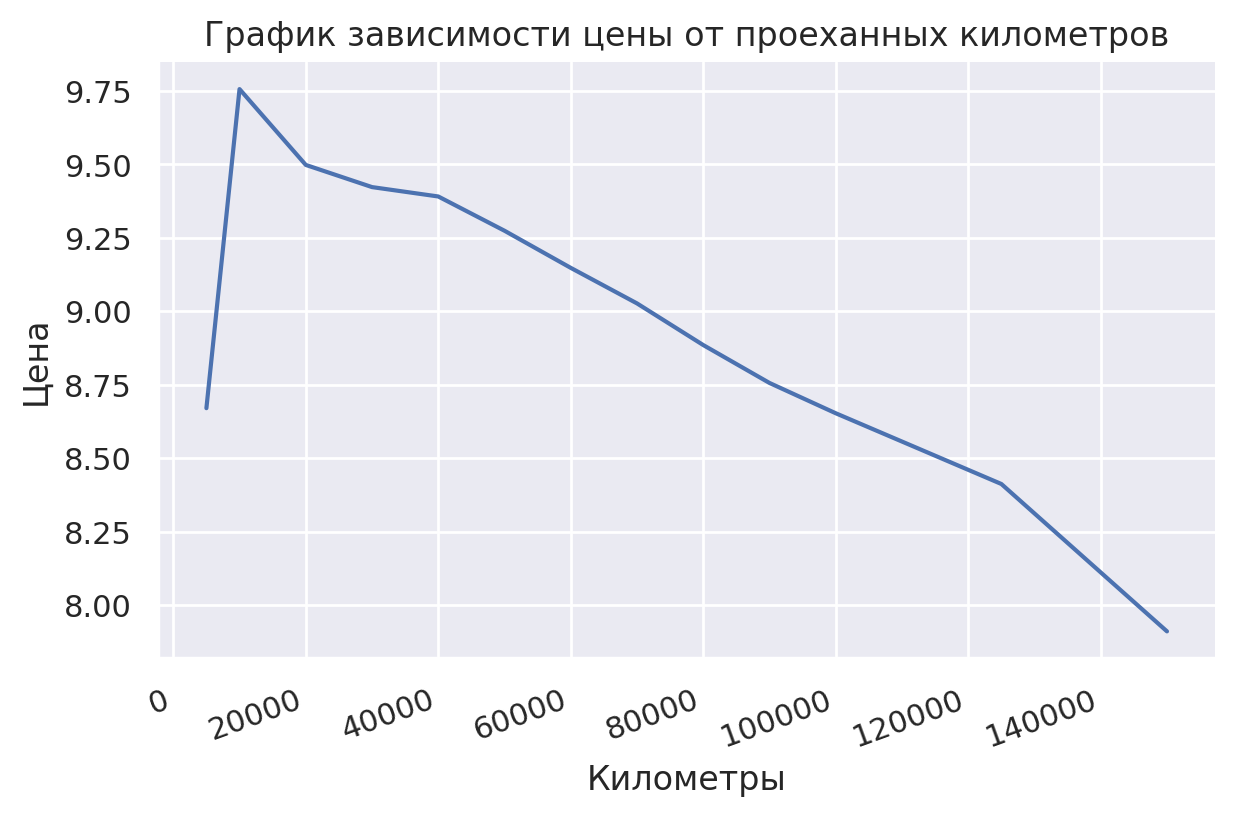

In [22]:
import warnings
warnings.filterwarnings('ignore')

tmp = data[['powerPS', 'log_price']].groupby('powerPS').mean()
tmp
plt.rcParams['font.size'] = 50
sns.relplot(data=tmp['log_price'], kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости цены от мощности')
plt.xlabel('Мощность')
plt.ylabel('Цена')
plt.xticks(rotation=20, ha='right')
plt.show()
tmp = data[['kilometer', 'log_price']].groupby('kilometer').mean()
tmp
plt.rcParams['font.size'] = 50
sns.relplot(data=tmp['log_price'], kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости цены от проеханных километров')
plt.xlabel('Километры')
plt.ylabel('Цена')
plt.xticks(rotation=20, ha='right')
plt.show()

Мощность хороша, а вот с километрами надо разделить на до максимума и после:

In [23]:
#add
tmp = data[['kilometer', 'log_price']].groupby('kilometer').mean()
print(tmp[tmp['log_price'] == tmp['log_price'].max()])
data['kilometer_price_up'] = np.where([(data['kilometer'] <= 10000)][0], True, False)
data['kilometer_price_down'] = np.where([(data['kilometer'] > 10000)][0], True, False)

           log_price
kilometer           
10000       9.756277


In [24]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage',
               'expensive_brand', 'expensive_vehicleType', 'new_auto', 'old_auto', 'kilometer_price_up', 'kilometer_price_down']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

In [25]:
data['bias'] = 1
if 'bias' not in other:
    other += ['bias']
x = data[categorical + numeric + other]
y = data['log_price']


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

x_train, x_tmp, y_train, y_tmp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_validate, y_test, y_validate = train_test_split(x_tmp, y_tmp, test_size=0.5, random_state=42)


In [27]:
print(x_train.shape)
# print(x_validate.shape)
# print(x_test.shape)
# print(y_train.index)
# print(len(y_train))
index = range(len(y_train))
y_train.index = index
index = range(len(y_test))
y_test.index = index
index = range(len(y_validate))
y_validate.index = index

(192663, 322)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [28]:
# ниче не понял, но np.matmul не работает, а заменить на @ работает, не шарю и меняю все

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 0
    }
}
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import expm1

def log_mse(predict, y_val):
    return mean_squared_error(expm1(predict), expm1(y_val))

def log_r2(predict, y_val):
    return r2_score(expm1(predict), expm1(y_val))

histories = {}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    min_mse = -1
    min_mse_lambda = None
    for lambda_ in np.linspace(-3, 3, 14):
        descent_config['kwargs']['lambda_'] = lambda_
        regr = LinearRegression(descent_config)
        regr = regr.fit(x_train, y_train)
        predict = regr.predict(x_validate)
        try:
            mse = log_mse(predict, y_validate)
        except ValueError:
            continue
        if min_mse == -1 or mse < min_mse:
            min_mse = mse
            min_mse_lambda = lambda_
    descent_config['kwargs']['lambda_'] = min_mse_lambda
    regr = LinearRegression(descent_config)
    regr = regr.fit(x_train, y_train)
    histories[descent_name] = regr.loss_history
    print(f"Result for {descent_name}:\nlambda={min_mse_lambda}, train set error: \
{log_mse(regr.predict(x_validate), y_validate)}, test set error: \
{log_mse(regr.predict(x_test), y_test)}, train set r2 score: \
{log_r2(regr.predict(x_validate), y_validate)}, test set r2 score: \
{log_r2(regr.predict(x_test), y_test)}, iterations: {len(regr.loss_history)}")

Result for full:
lambda=0.6923076923076925, train set error: 43164815.73306505, test set error: 51969202.138759546, train set r2 score: 0.5747615990348365, test set r2 score: 0.561714749841169, iterations: 73
Result for stochastic:
lambda=0.23076923076923084, train set error: 59898343.975543074, test set error: 64688322.980786234, train set r2 score: 0.53247380889594, test set r2 score: 0.5338729307770766, iterations: 115
Result for momentum:
lambda=0.23076923076923084, train set error: 33751633.70747609, test set error: 36378965.5562125, train set r2 score: 0.623108924053579, test set r2 score: 0.6336709931064128, iterations: 87
Result for adam:
lambda=3.0, train set error: 41352146.21568888, test set error: 49753248.250780135, train set r2 score: 0.6508630061348932, test set r2 score: 0.6311625260915984, iterations: 246


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

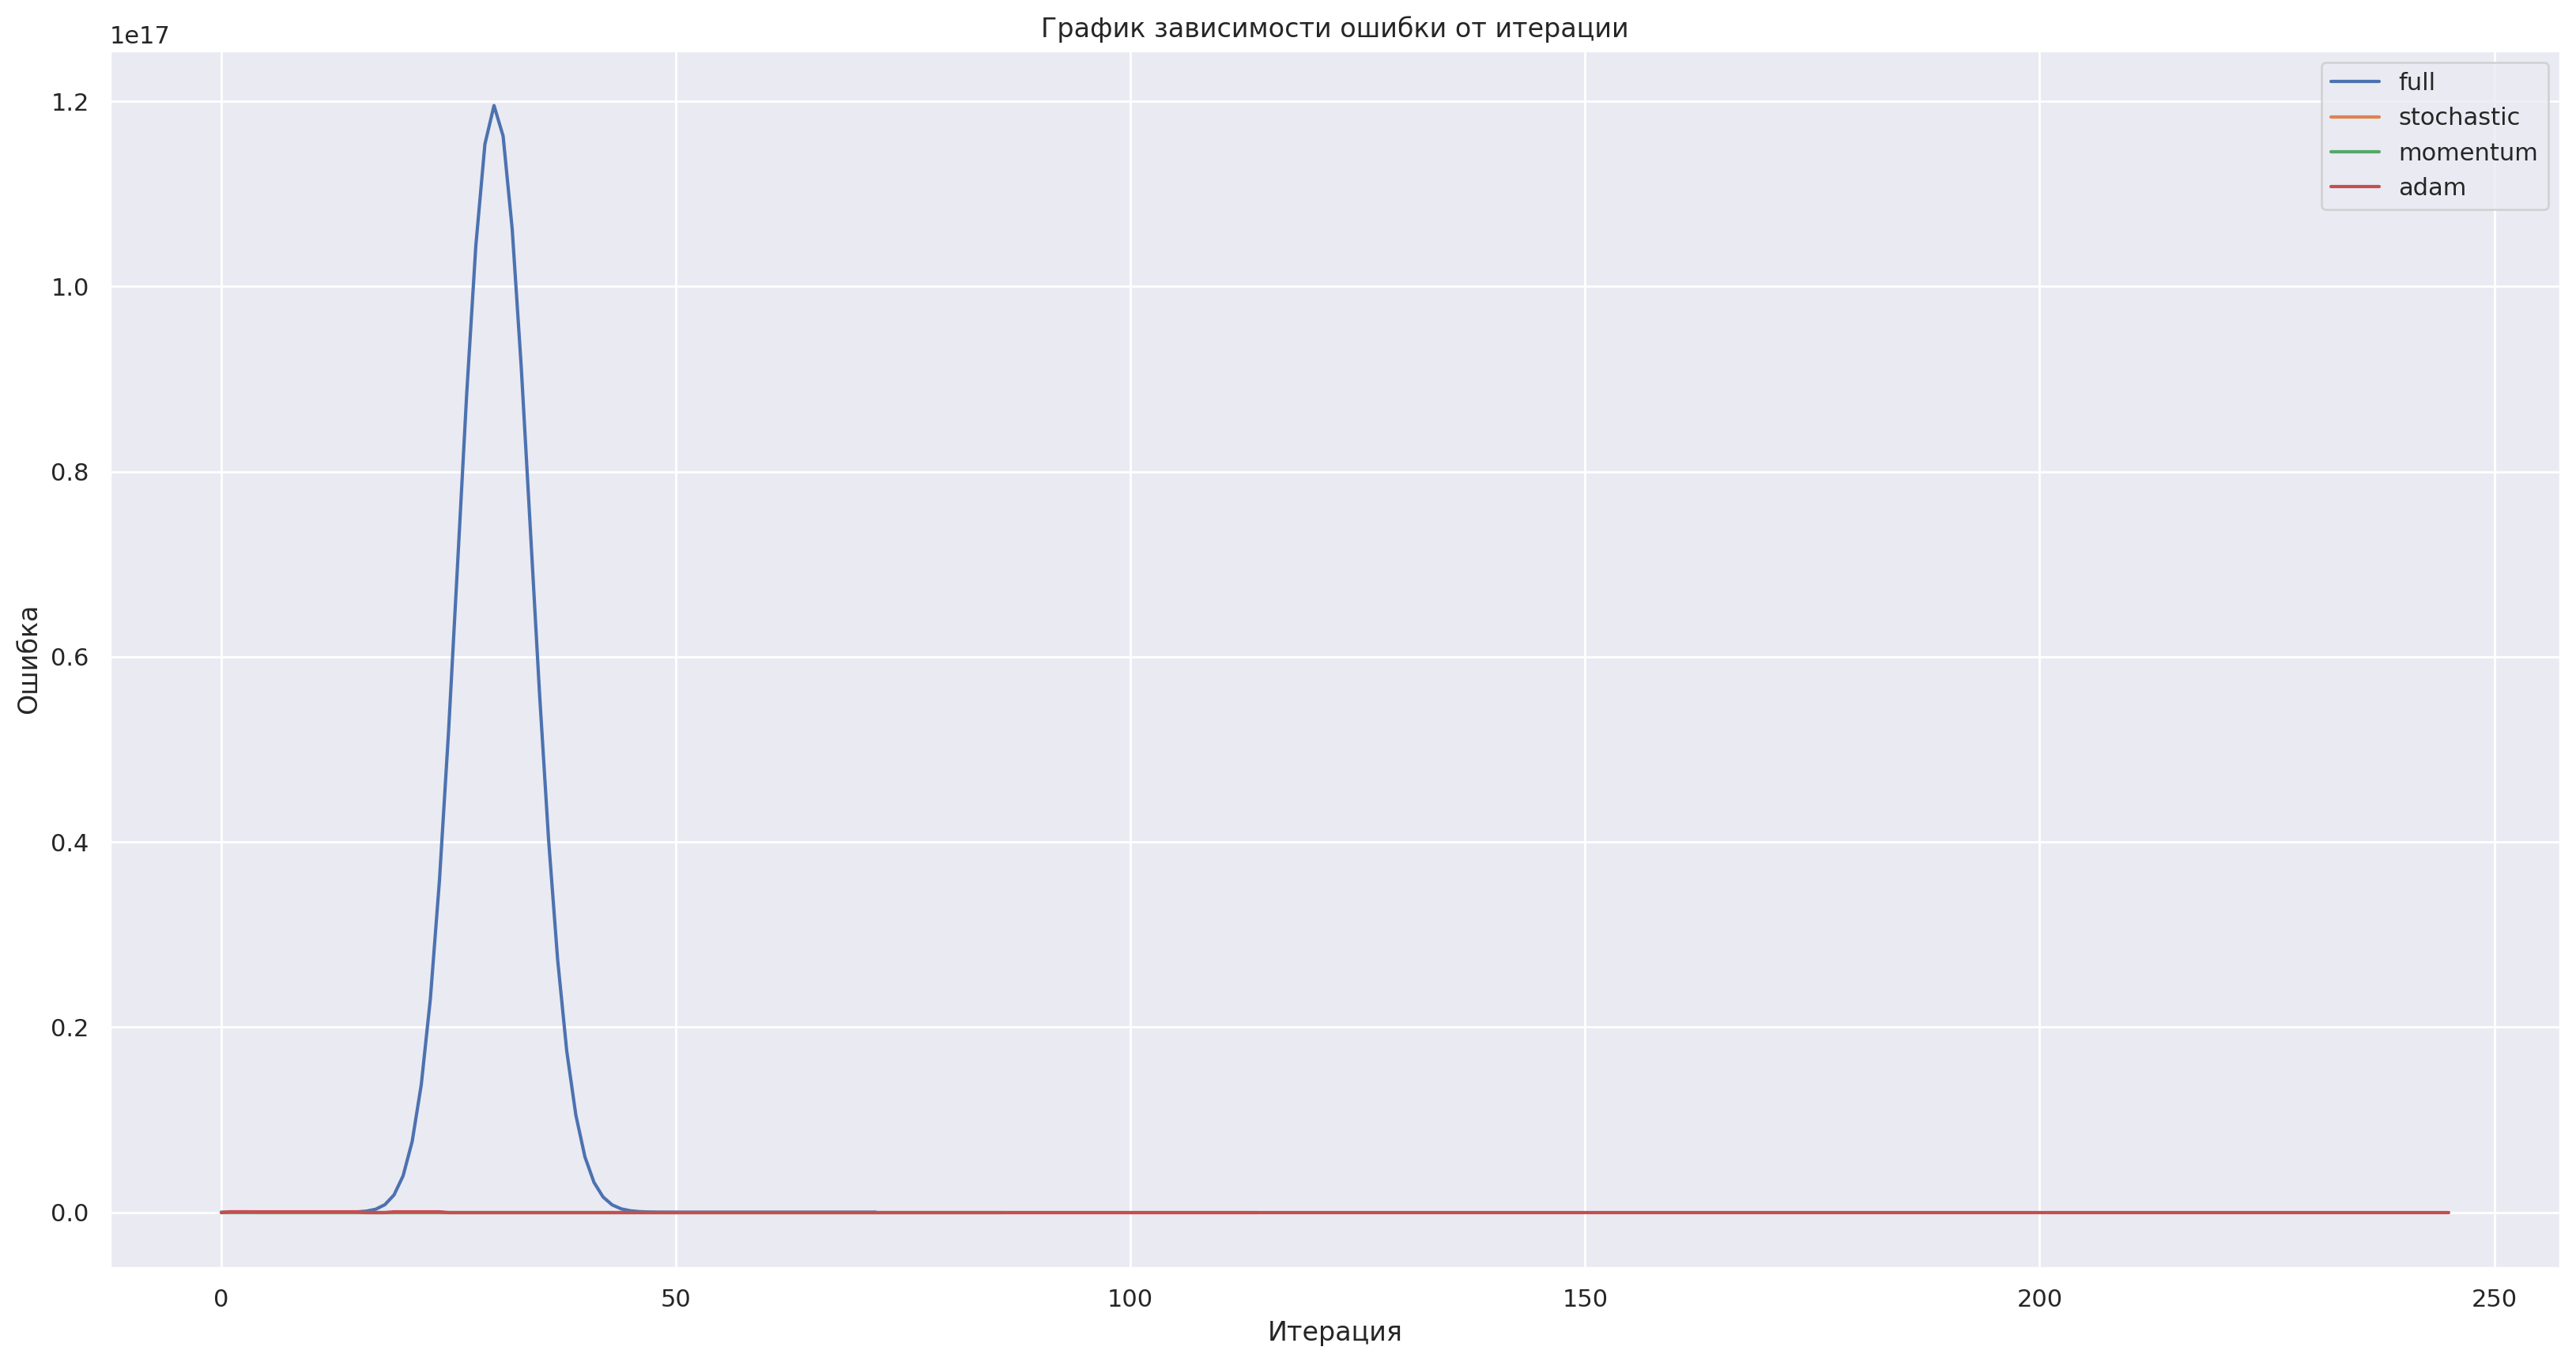

In [29]:
plt.figure(figsize=(20,10))
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    loss_history = pd.DataFrame(histories[descent_name])
    plt.plot(loss_history, label=descent_name)
    plt.title('График зависимости ошибки от итерации')
    plt.xlabel('Итерация')
    plt.ylabel('Ошибка')

plt.legend()
plt.show()

Что-то full улетел в моменте далеко не туда, так что остальное не видно, нарисую отдельно их еще:

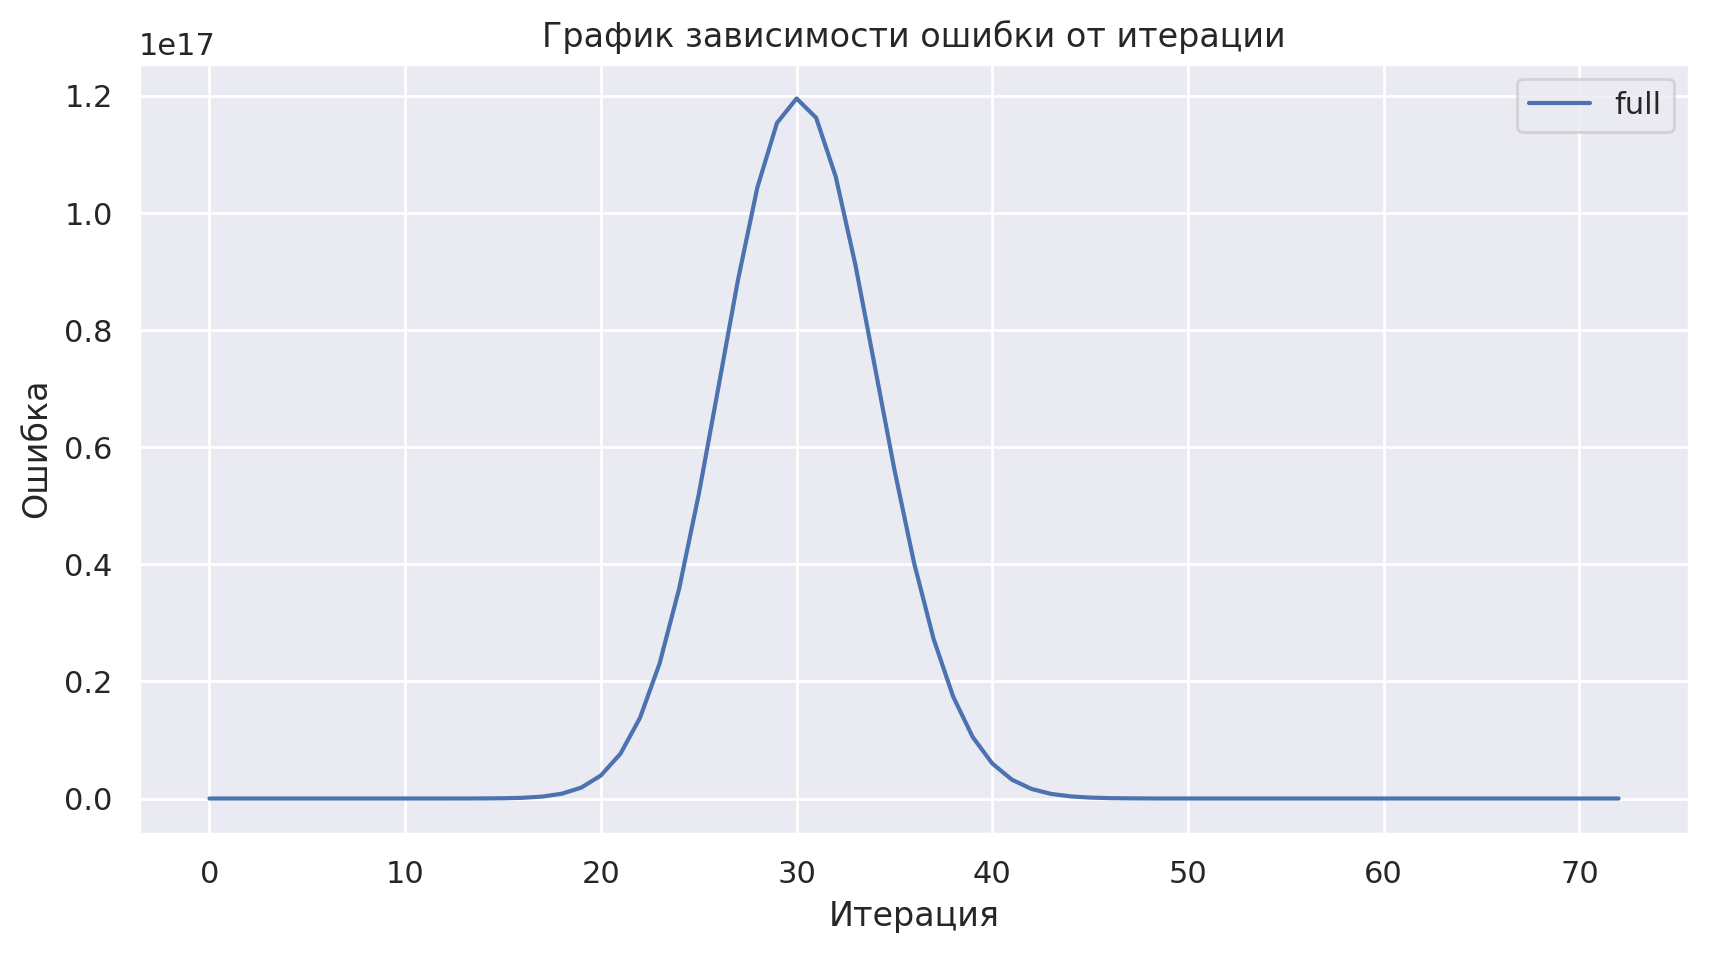

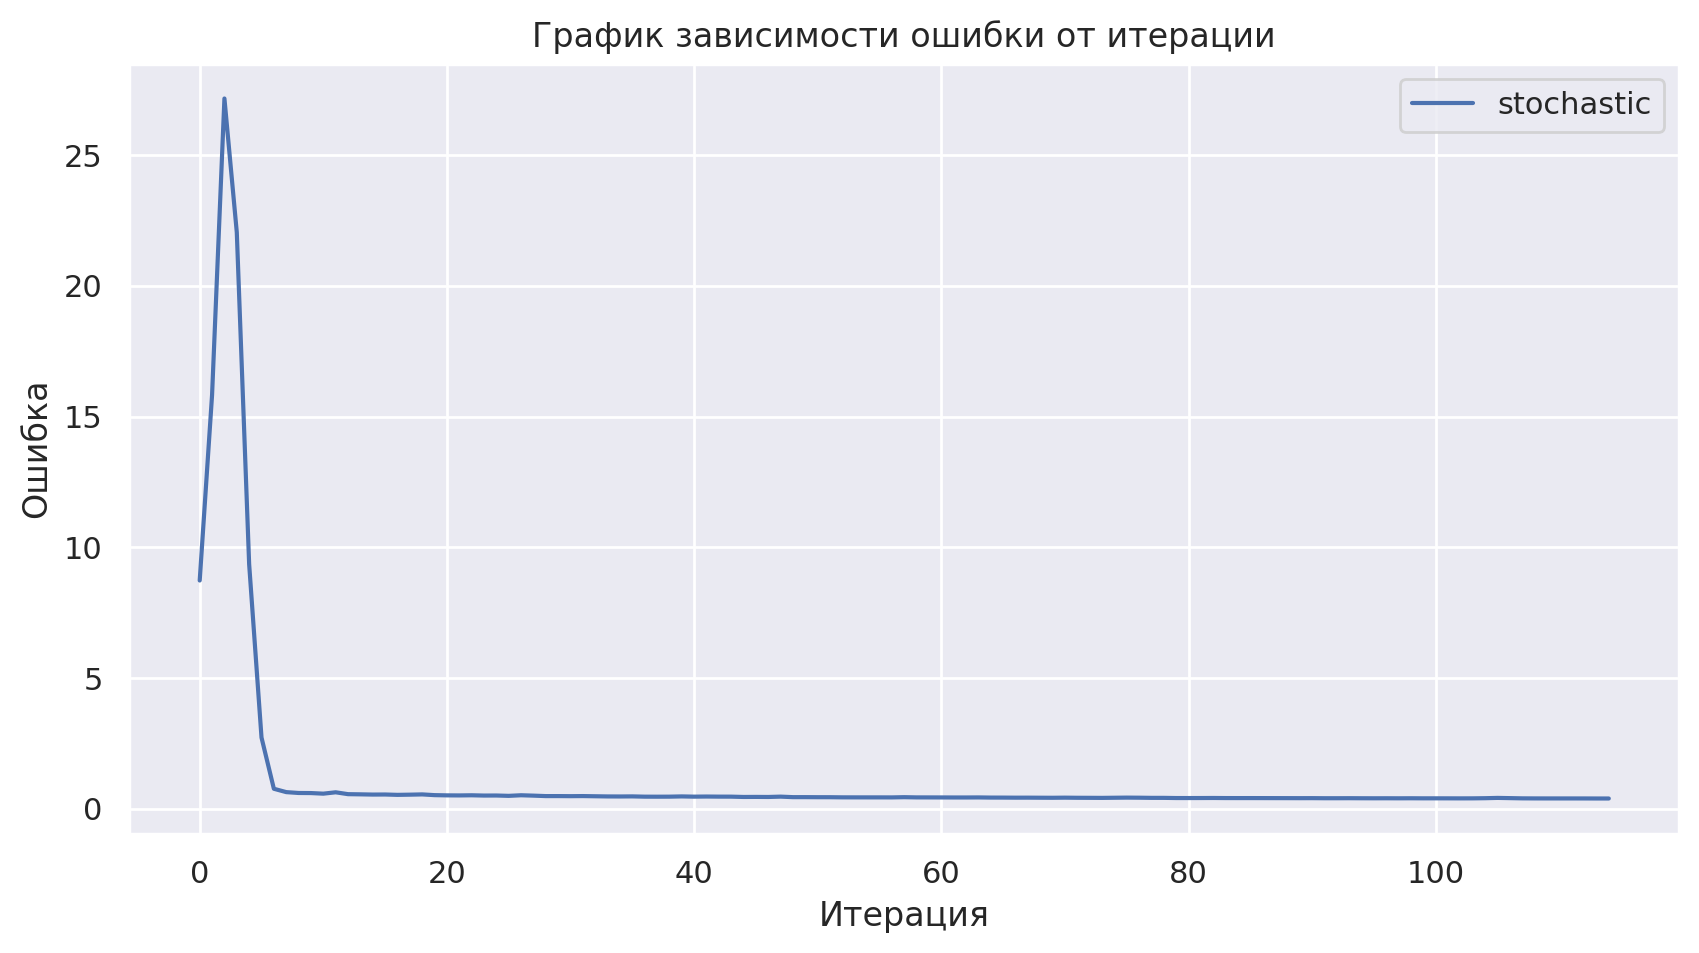

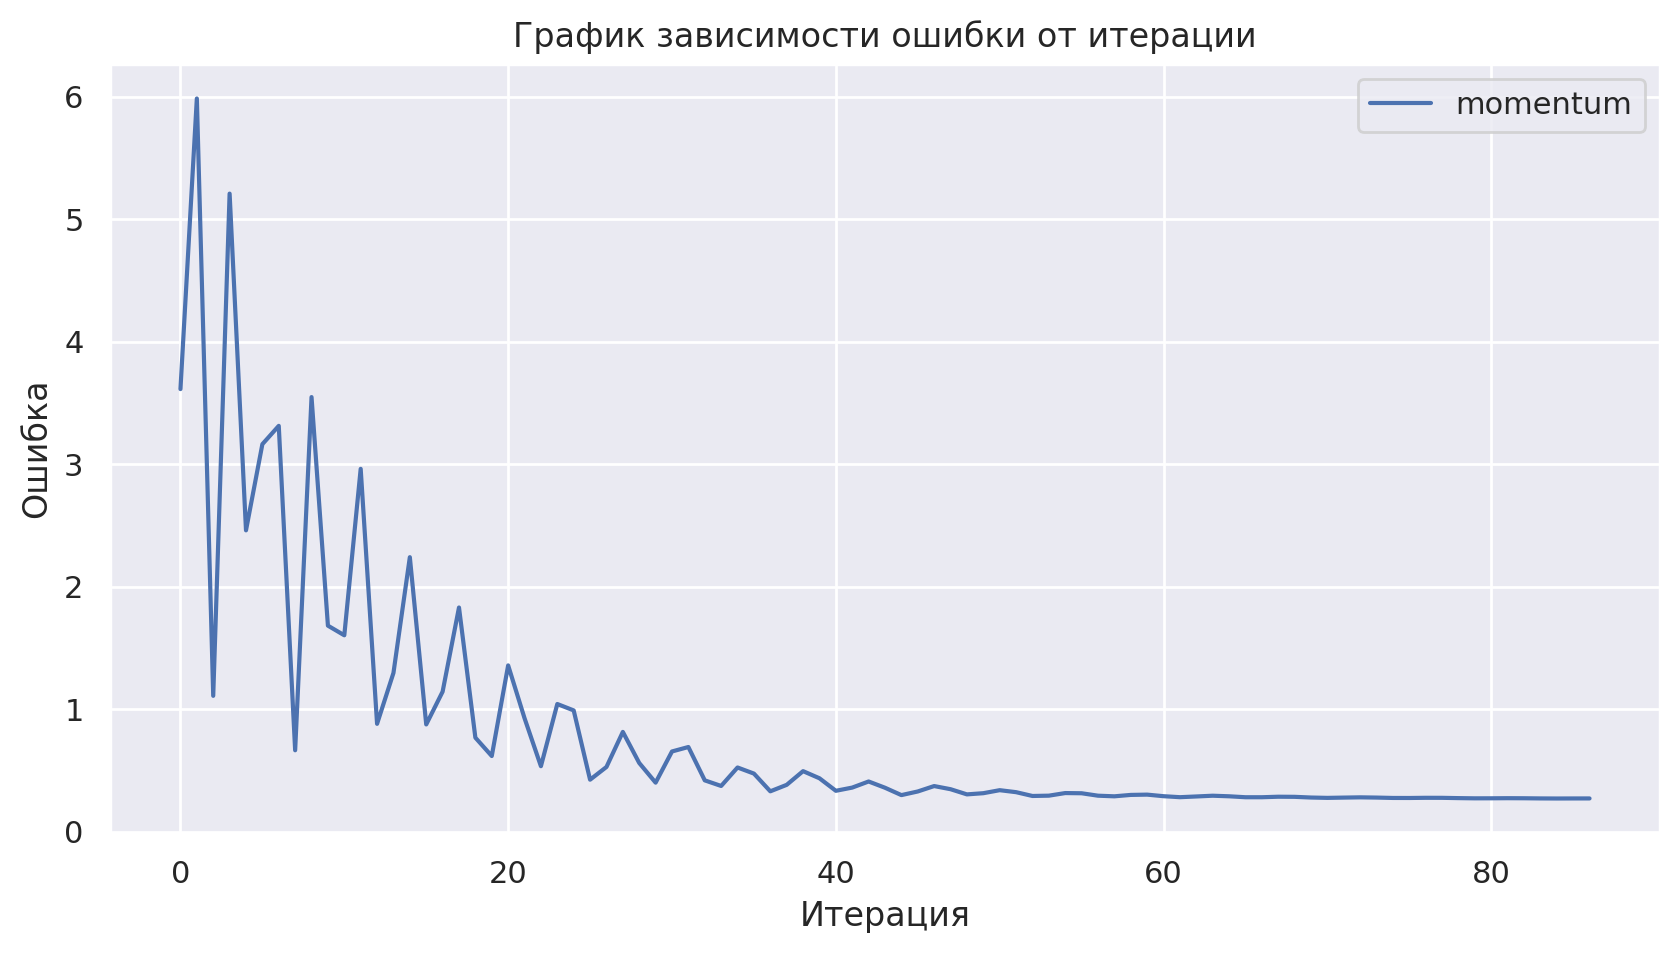

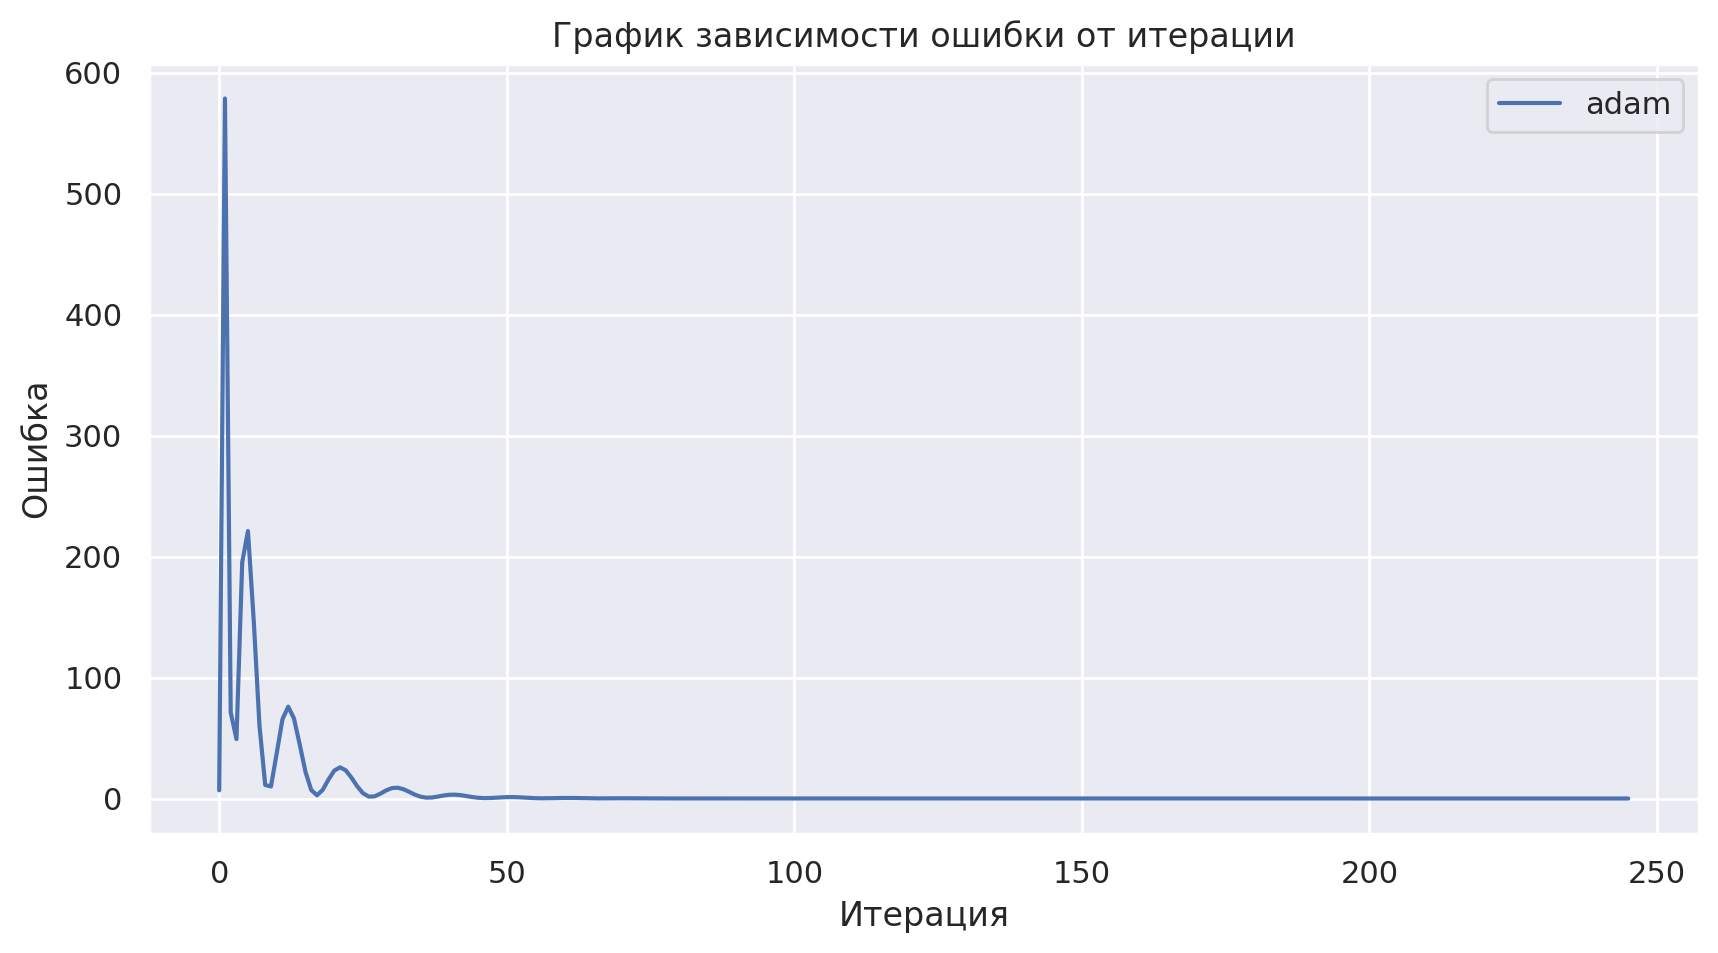

In [31]:
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    plt.figure(figsize=(10,5))
    loss_history = pd.DataFrame(histories[descent_name])
    plt.plot(loss_history, label=descent_name)
    plt.title('График зависимости ошибки от итерации')
    plt.xlabel('Итерация')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()

Full во-первых довольно странно себя ведет, уходя не туда, во-вторых сходится дольше всех


Stochastic красиво быстро улетает вниз и начинает сходиться раньше всех, 


Momentum очень сильно шатает (ожидаемо, если нас один раз шатнуло, то на всю жизнь запомним)


Adam красиво и быстро сходится, чуть попрыгав.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

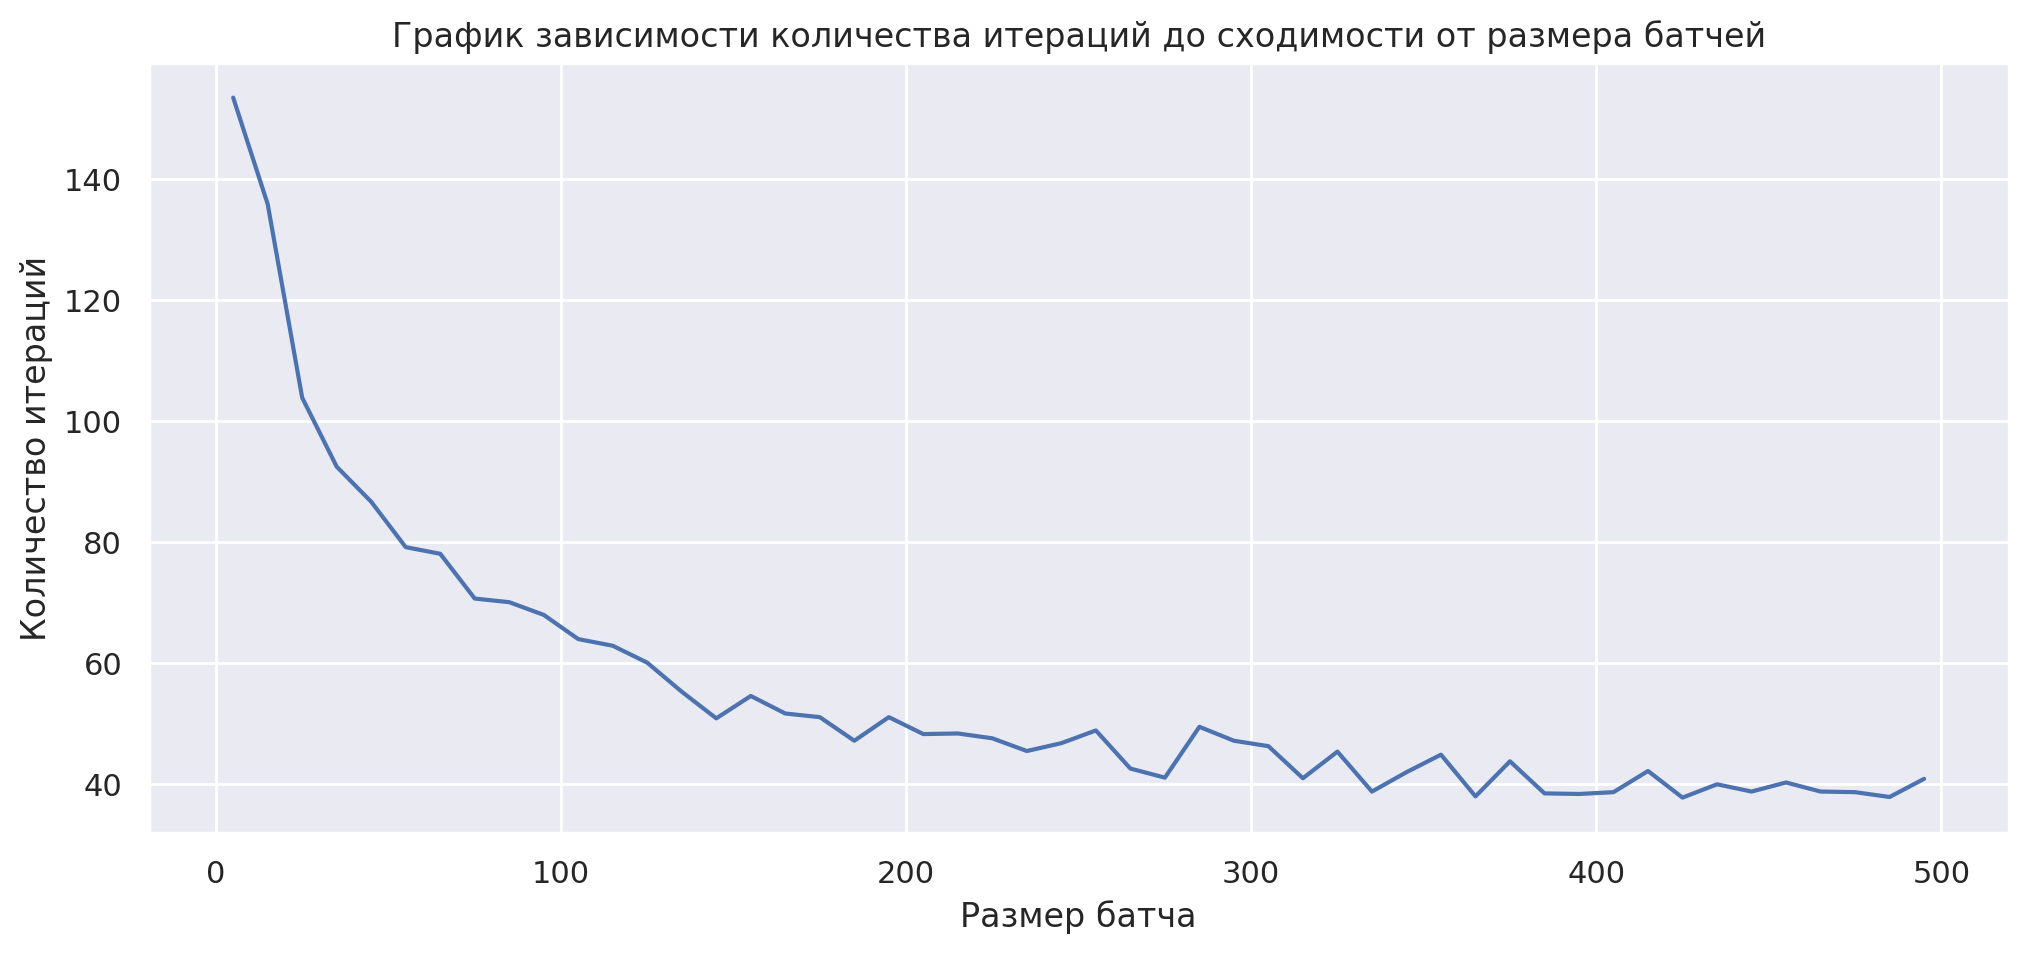

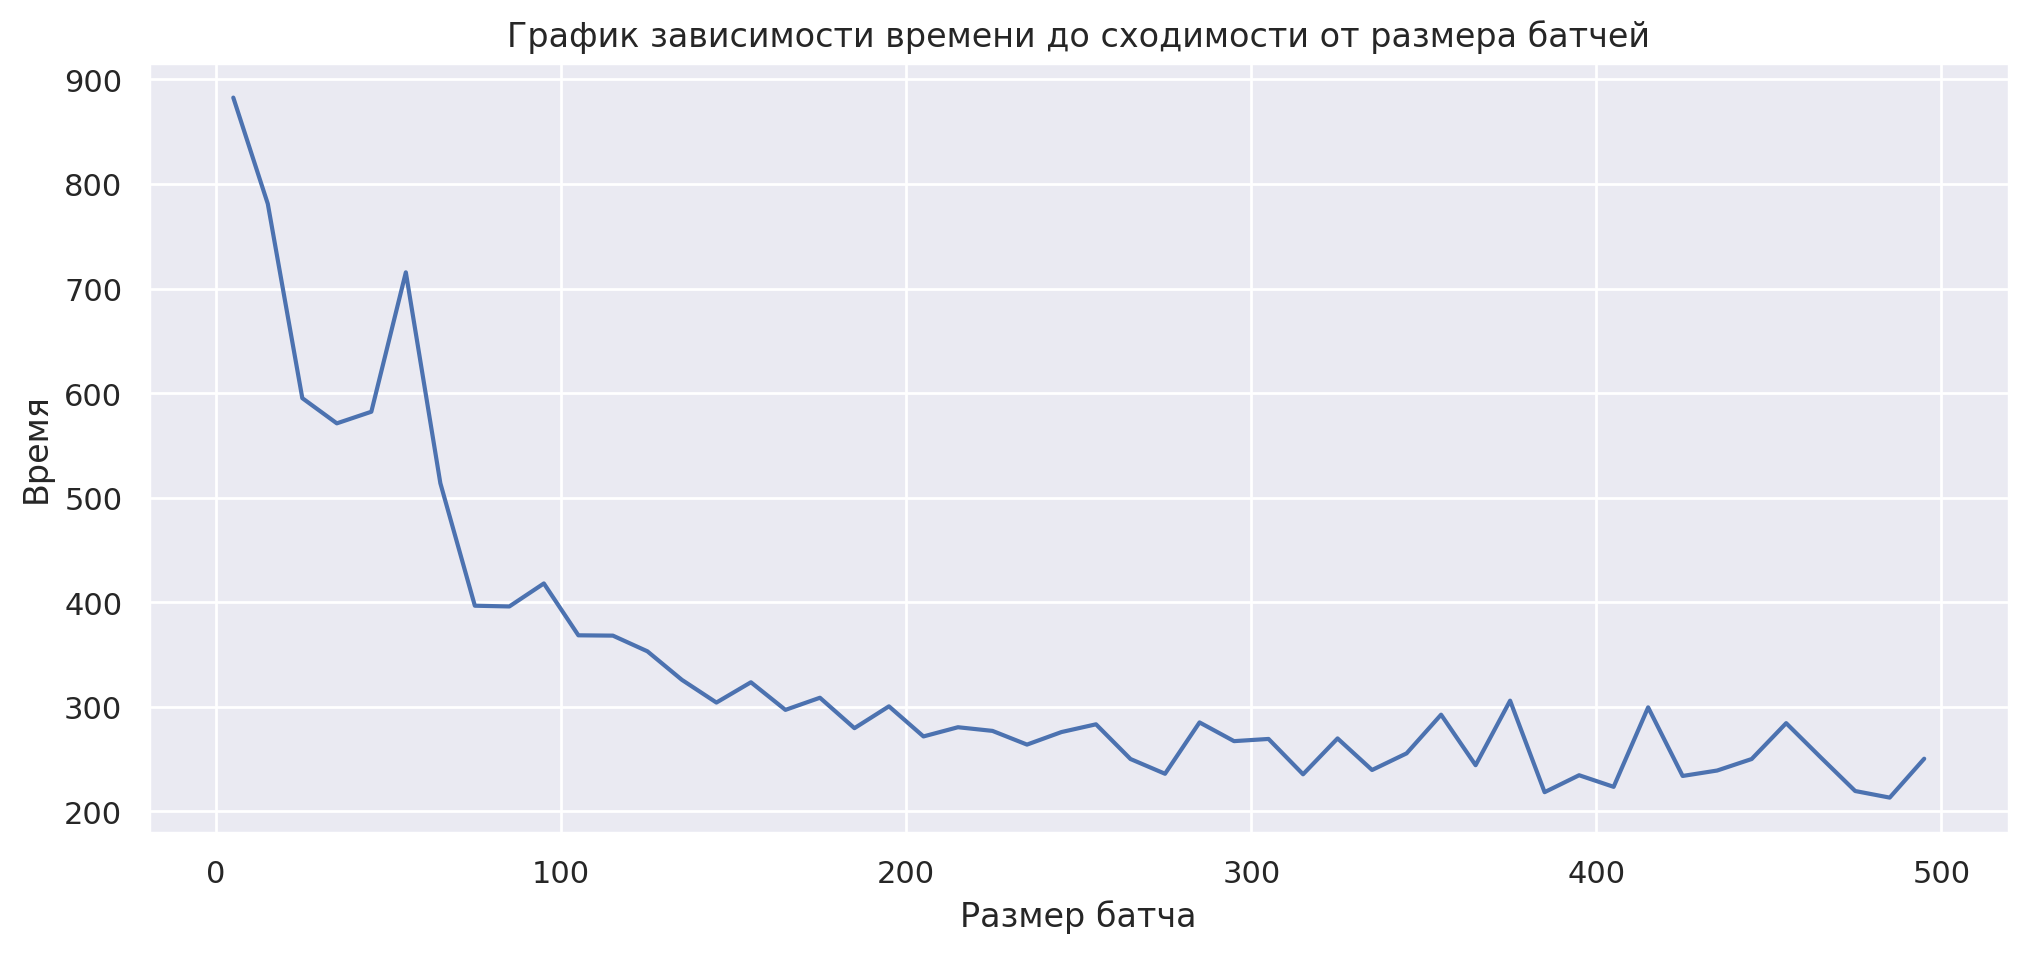

In [33]:
batch_sizes = np.arange(5, 500, 10)
k = 10
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 0.23076923076923084,
        "batch_size": 50
    }
}
import time

def current_milli_time():
    return round(time.time() * 1000)
iters = []
times = []
for size in batch_sizes:
    time_sum = 0
    iter_sum = 0
    for test in range(k):
        descent_config['kwargs']['batch_size'] = size
        regr = LinearRegression(descent_config)
        time1 = current_milli_time()
        regr = regr.fit(x_train, y_train)
        time_sum += (current_milli_time() - time1) / k
        iter_sum += len(regr.loss_history) / k
    iters.append(iter_sum)
    times.append(time_sum)

iters_df = pd.DataFrame(data={"iterations": iters, "size": batch_sizes})
plt.figure(figsize=(12,5))
plt.plot(iters_df['size'], iters_df['iterations'])
plt.title('График зависимости количества итераций до сходимости от размера батчей')
plt.xlabel('Размер батча')
plt.ylabel('Количество итераций')
plt.show()

times_df = pd.DataFrame(data={"times": times, "size": batch_sizes})
plt.figure(figsize=(12,5))
plt.plot(times_df['size'], times_df['times'])
plt.title('График зависимости времени до сходимости от размера батчей')
plt.xlabel('Размер батча')
plt.ylabel('Время')
plt.show()

Общий тренд конечно предсказуемый, чем больше размер батча, тем меньше итераций. А насчет времени неочевидно, наверное это будет выглядеть как парабола ветвями вверх, потому что чем больше размер батча, тем меньше итераций и за счет этого быстрее считается, но думаю что при последующем увеличении размера время до сходимости будет увеличиваться.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Я решил поделиться теплом со своим близким нетрадиционного формата, рецепт следующий:
Покупаем новый корм (в данном случае это little one), угощаем им нашего брата меньшего, видеоотзыв: [отзыв](https://disk.yandex.ru/i/QUfETTnll6VSFQ)


Итог: другу не понравилось и он захотел сбежать(

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: